## Model Fitting without Bets

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit



# Import the three supervised learning models from sklearn
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from importlib import reload


D:\Users\karel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
data = pd.read_csv('Data_Structures/FINAL_BASE_DATASET.csv',index_col=0)

In [58]:
data

,away_Defender_rating,home_Defender_rating,away_Attacker_rating,home_Attacker_rating,away_Goalkeeper_rating,home_Goalkeeper_rating,away_Midfielder_rating,home_Midfielder_rating,HEAD_2_HEAD_HOME_TEAM_WINS,HEAD_2_HEAD_HOME_TEAM_LOSS,...,shoton_home,shoton_away,shotoff_home,shotoff_away,HOME_DRAW_RATE,HOME_DRAW_RATE_THIS_SEASON,AWAY_DRAW_RATE,AWAY_DRAW_RATE_THIS_SEASON,AWAY_DRAW_RATE_AT_THIS_GROUND,Label
0,64.500000,72.666667,67.666667,74.000000,63.0,72.0,64.333333,73.833333,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.142857,0.200000,0.181818,0.250000,0.000000,2
1,64.600000,65.666667,66.500000,69.000000,69.0,71.0,66.000000,69.600000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.117647,0.000000,0.066667,0.200000,0.000000,2
2,64.000000,64.333333,67.000000,66.000000,63.0,69.0,65.400000,65.600000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.375000,0.200000,0.153846,0.500000,0.145833,1
3,63.000000,64.750000,68.500000,65.000000,71.0,65.0,69.666667,65.500000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.136364,0.166667,0.200000,0.000000,1.000000,0
4,64.666667,61.000000,67.333333,0.000000,68.0,58.0,65.250000,61.000000,0.125000,0.500000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.200000,1.000000,0
5,63.800000,64.333333,68.500000,66.333333,63.0,69.0,74.333333,65.250000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.444444,0.428571,0.315789,0.166667,0.000000,2
6,63.500000,63.750000,0.000000,68.000000,49.0,70.0,61.666667,62.000000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.666667,0.666667,0.125000,0.200000,1.000000,0
7,67.500000,60.500000,69.500000,63.000000,72.0,64.0,68.833333,63.750000,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.000000,0.398434,0
8,65.000000,69.333333,68.000000,73.000000,72.0,72.0,65.400000,71.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.173913,0.285714,0.214286,0.600000,0.000000,1
9,72.333333,62.000000,74.000000,65.000000,72.0,68.0,72.166667,65.333333,0.000000,1.000000,...,0.0,0.0,0.0,0.0,0.062500,0.000000,0.100000,0.100000,1.000000,0


### Shuffle and split

In [26]:

X_data=data.drop(['Label'],axis=1)
Y_data=data['Label']
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    Y_data, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2, random_state=0)
for train_index, test_index in s.split(X_data, Y_data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b, X_test_b = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_b, y_test_b = Y_data.iloc[train_index], Y_data.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b.shape[0]))
print ("Testing set has {} samples.".format(X_test_b.shape[0]))

Training set has 13887 samples.
Testing set has 3472 samples.


### A training and predicting pipeline

In [10]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])    
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = f1_score(y_train[:300], predictions_train,
                                     average='micro')
    # Compute F-score on the test set which is y_test
    results['f_test'] = f1_score(y_test, predictions_test, 
                                    average='micro')  
    # Success
    print ("{} trained.".format(learner.__class__.__name__))
        
    # Return the results
    return results

In [28]:


clf_A = QuadraticDiscriminantAnalysis()


clf_B = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 15), random_state=1)
clf_C = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)


results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)

        
        


D:\Users\karel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained.
MLPClassifier trained.
AdaBoostClassifier trained.


In [29]:
results

{'AdaBoostClassifier': {'acc_test': 0.5357142857142857,
  'acc_train': 0.58333333333333337,
  'f_test': 0.5357142857142857,
  'f_train': 0.58333333333333337,
  'train_time': 36.263712644577026},
 'MLPClassifier': {'acc_test': 0.44930875576036866,
  'acc_train': 0.47666666666666668,
  'f_test': 0.44930875576036866,
  'f_train': 0.47666666666666668,
  'train_time': 0.27532029151916504},
 'QuadraticDiscriminantAnalysis': {'acc_test': 0.48156682027649772,
  'acc_train': 0.51333333333333331,
  'f_test': 0.48156682027649772,
  'f_train': 0.51333333333333331,
  'train_time': 0.13150668144226074}}

[('home_Defender_age', 5.8000000000000007), ('away_Midfielder_bmi', 4.9000000000000004), ('home_Goalkeeper_age', 4.2999999999999998), ('away_Midfielder_age', 4.1000000000000005), ('away_Defender_age', 4.0), ('home_Midfielder_bmi', 3.7999999999999998), ('away_Goalkeeper_age', 3.6999999999999997), ('home_Attacker_age', 3.5000000000000004), ('away_Defender_bmi', 3.4000000000000004), ('home_Defender_bmi', 3.4000000000000004), ('home_Defender_rating', 3.1000000000000001), ('home_Midfielder_rating', 2.9000000000000004), ('AWAY_WIN_RATE_AT_THIS_GROUND', 2.9000000000000004), ('away_Attacker_age', 2.9000000000000004), ('away_Defender_rating', 2.8000000000000003), ('away_Midfielder_rating', 2.7000000000000002), ('AWAY_DRAW_RATE', 2.6000000000000001), ('home_Midfielder_age', 2.3999999999999999), ('home_Attacker_rating', 2.2999999999999998), ('HOME_WIN_RATE', 2.2999999999999998), ('AWAY_WIN_RATE', 2.1999999999999997), ('home_Attacker_bmi', 2.1999999999999997), ('AWAY_DRAW_RATE_THIS_SEASON', 1.8999

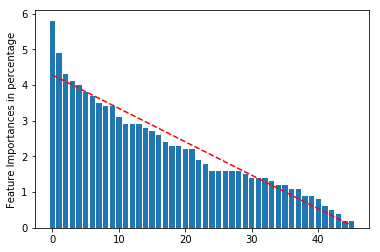

In [30]:
import matplotlib.pyplot as plt

NUM_FEATURES = len(X_train_b.columns)
dict_feature_names_to_importances = dict(zip(X_train_b.columns, clf_C.feature_importances_ * 100))
sorted_tuples = sorted(dict_feature_names_to_importances.items(), key=lambda x:x[1], reverse=True)
print (sorted_tuples[0: NUM_FEATURES - 1])

feature_names =list(zip(*sorted_tuples[0: NUM_FEATURES - 1]))[0]
importances = list(zip(*sorted_tuples[0: NUM_FEATURES - 1]))[1]
x_pos = np.arange(len(feature_names)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, importances, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, importances,align='center')
plt.ylabel('Feature Importances in percentage')
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

clf_A = KNeighborsClassifier()


clf_B = GaussianNB()
clf_C = RandomForestClassifier()

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)

KNeighborsClassifier trained.
GaussianNB trained.
RandomForestClassifier trained.


In [67]:
results

{'GaussianNB': {'acc_test': 0.5195852534562212,
  'acc_train': 0.5033333333333333,
  'f_test': 0.5195852534562212,
  'f_train': 0.5033333333333333,
  'train_time': 0.015039920806884766},
 'KNeighborsClassifier': {'acc_test': 0.37586405529953915,
  'acc_train': 0.57333333333333336,
  'f_test': 0.37586405529953915,
  'f_train': 0.57333333333333336,
  'train_time': 0.04821062088012695},
 'RandomForestClassifier': {'acc_test': 0.50259216589861755,
  'acc_train': 0.97999999999999998,
  'f_test': 0.50259216589861755,
  'f_train': 0.97999999999999998,
  'train_time': 0.43471789360046387}}

## Model Fitting with Bets

In [31]:
data_wb = pd.read_csv('Data_Structures/FINAL_BASE_DATASET_WITH_BETS.csv',index_col=0)

In [82]:
len(data_wb.columns)

57

In [32]:

# Import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X_data_wb=data_wb.drop(['Label'],axis=1)
Y_data_wb=data_wb['Label']
# Split the 'features' and 'income' data into training and testing sets
X_train_wb, X_test_wb, y_train_wb, y_test_wb = train_test_split(X_data_wb, 
                                                    Y_data_wb, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2, random_state=0)
for train_index, test_index in s.split(X_data_wb, Y_data_wb):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b_wb, X_test_b_wb = X_data_wb.iloc[train_index], X_data_wb.iloc[test_index]
    y_train_b_wb, y_test_b_wb = Y_data_wb.iloc[train_index], Y_data_wb.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b_wb.shape[0]))
print ("Testing set has {} samples.".format(X_test_b_wb.shape[0]))

Training set has 12613 samples.
Testing set has 3154 samples.


In [33]:
clf_A = QuadraticDiscriminantAnalysis()


clf_B = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 15), random_state=1)
clf_C = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train_b_wb, y_train_b_wb, X_test_b_wb, y_test_b_wb)

D:\Users\karel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained.
MLPClassifier trained.
AdaBoostClassifier trained.


In [34]:
results

{'AdaBoostClassifier': {'acc_test': 0.53424223208623967,
  'acc_train': 0.62666666666666671,
  'f_test': 0.53424223208623967,
  'f_train': 0.62666666666666671,
  'train_time': 37.685569763183594},
 'MLPClassifier': {'acc_test': 0.43595434369055169,
  'acc_train': 0.43333333333333335,
  'f_test': 0.43595434369055169,
  'f_train': 0.43333333333333335,
  'train_time': 0.49849867820739746},
 'QuadraticDiscriminantAnalysis': {'acc_test': 0.45085605580215599,
  'acc_train': 0.51333333333333331,
  'f_test': 0.45085605580215599,
  'f_train': 0.51333333333333331,
  'train_time': 0.031244993209838867}}

[('home_Defender_bmi', 5.2999999999999998), ('home_Defender_age', 4.7000000000000002), ('home_Midfielder_age', 3.8999999999999999), ('home_Attacker_age', 3.6999999999999997), ('home_Midfielder_bmi', 3.3000000000000003), ('away_Midfielder_age', 3.2000000000000002), ('home_Midfielder_rating', 3.1000000000000001), ('home_Defender_rating', 2.9000000000000004), ('home_Goalkeeper_age', 2.9000000000000004), ('away_Goalkeeper_age', 2.8000000000000003), ('away_Midfielder_bmi', 2.8000000000000003), ('AWAY_DRAW_RATE_AT_THIS_GROUND', 2.8000000000000003), ('away_Defender_age', 2.7000000000000002), ('away_Defender_bmi', 2.7000000000000002), ('away_Attacker_age', 2.3999999999999999), ('away_Midfielder_rating', 2.2999999999999998), ('AWAY_WIN_RATE_AT_THIS_GROUND', 2.1999999999999997), ('B365H', 2.1000000000000001), ('away_Attacker_bmi', 2.0), ('AWAY_DRAW_RATE', 2.0), ('away_Defender_rating', 1.8999999999999999), ('AWAY_WIN_RATE', 1.8999999999999999), ('BWA', 1.8999999999999999), ('home_Goalkeeper_rati

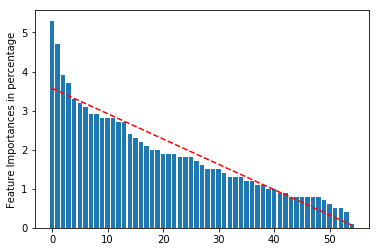

In [35]:
import matplotlib.pyplot as plt

NUM_FEATURES = len(X_train_b_wb.columns)
dict_feature_names_to_importances = dict(zip(X_train_b_wb.columns, clf_C.feature_importances_ * 100))
sorted_tuples = sorted(dict_feature_names_to_importances.items(), key=lambda x:x[1], reverse=True)
print (sorted_tuples[0: NUM_FEATURES - 1])

feature_names =list(zip(*sorted_tuples[0: NUM_FEATURES - 1]))[0]
importances = list(zip(*sorted_tuples[0: NUM_FEATURES - 1]))[1]
x_pos = np.arange(len(feature_names)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, importances, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, importances,align='center')
plt.ylabel('Feature Importances in percentage')
plt.show()

### Model Fit after removing zeros from age/bmi and replacing with average

In [10]:
data_wb_clean = pd.read_csv('Data_Structures/FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED.csv',index_col=0)

X_data_wb_clean=data_wb_clean.drop(['Label'],axis=1)
Y_data_wb_clean=data_wb_clean['Label']
# Split the 'features' and 'income' data into training and testing sets
X_train_wb_clean, X_test_wb_clean, y_train_wb_clean, y_test_wb_clean = train_test_split(X_data_wb_clean, 
                                                    Y_data_wb_clean, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2, random_state=0)
for train_index, test_index in s.split(X_data_wb_clean, Y_data_wb_clean):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b_wb_clean, X_test_b_wb_clean = X_data_wb_clean.iloc[train_index], X_data_wb_clean.iloc[test_index]
    y_train_b_wb_clean, y_test_b_wb_clean = Y_data_wb_clean.iloc[train_index], Y_data_wb_clean.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b_wb_clean.shape[0]))
print ("Testing set has {} samples.".format(X_test_b_wb_clean.shape[0]))

Training set has 12613 samples.
Testing set has 3154 samples.


In [37]:
clf_A = QuadraticDiscriminantAnalysis()


clf_B = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 15), random_state=1)
clf_C = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = train_predict(clf, X_train_b_wb_clean, y_train_b_wb_clean, X_test_b_wb_clean, y_test_b_wb_clean)

D:\Users\karel\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis trained.
MLPClassifier trained.
AdaBoostClassifier trained.


In [38]:
results

{'AdaBoostClassifier': {'acc_test': 0.5221940393151554,
  'acc_train': 0.62,
  'f_test': 0.5221940393151554,
  'f_train': 0.62,
  'train_time': 38.6547691822052},
 'MLPClassifier': {'acc_test': 0.45370957514267596,
  'acc_train': 0.42999999999999999,
  'f_test': 0.45370957514267596,
  'f_train': 0.42999999999999994,
  'train_time': 0.26004981994628906},
 'QuadraticDiscriminantAnalysis': {'acc_test': 0.47748890298034241,
  'acc_train': 0.53333333333333333,
  'f_test': 0.47748890298034241,
  'f_train': 0.53333333333333333,
  'train_time': 0.037290096282958984}}

[('away_Midfielder_bmi', 4.2999999999999998), ('home_Attacker_age', 4.2000000000000002), ('away_Attacker_age', 3.8999999999999999), ('home_Defender_age', 3.6999999999999997), ('away_Midfielder_age', 3.5999999999999996), ('home_Defender_bmi', 3.5999999999999996), ('Unnamed: 0.1', 3.4000000000000004), ('away_Defender_age', 3.2000000000000002), ('away_Goalkeeper_age', 3.1000000000000001), ('home_Midfielder_age', 3.0), ('away_Defender_bmi', 3.0), ('home_Midfielder_bmi', 2.9000000000000004), ('home_Defender_rating', 2.8000000000000003), ('AWAY_WIN_RATE_AT_THIS_GROUND', 2.6000000000000001), ('away_Attacker_bmi', 2.5), ('AWAY_DRAW_RATE', 2.2999999999999998), ('home_Midfielder_rating', 2.1999999999999997), ('away_Midfielder_rating', 2.1000000000000001), ('home_Attacker_bmi', 2.1000000000000001), ('AWAY_DRAW_RATE_AT_THIS_GROUND', 2.1000000000000001), ('home_Goalkeeper_age', 2.0), ('BWH', 1.8999999999999999), ('B365H', 1.7999999999999998), ('BWA', 1.7999999999999998), ('AWAY_DRAW_RATE_THIS_SEASO

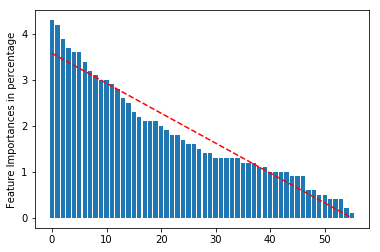

In [39]:

NUM_FEATURES = len(X_train_b_wb_clean.columns)
dict_feature_names_to_importances = dict(zip(X_train_b_wb_clean.columns, clf_C.feature_importances_ * 100))
sorted_tuples = sorted(dict_feature_names_to_importances.items(), key=lambda x:x[1], reverse=True)
print (sorted_tuples[0: NUM_FEATURES - 1])

feature_names =list(zip(*sorted_tuples[0: NUM_FEATURES - 1]))[0]
importances = list(zip(*sorted_tuples[0: NUM_FEATURES - 1]))[1]
x_pos = np.arange(len(feature_names)) 

# calculate slope and intercept for the linear trend line
slope, intercept = np.polyfit(x_pos, importances, 1)
trendline = intercept + (slope * x_pos)

plt.plot(x_pos, trendline, color='red', linestyle='--')    
plt.bar(x_pos, importances,align='center')
plt.ylabel('Feature Importances in percentage')
plt.show()

## Let's follow a pipeline and start tuning

### First Let's try standardizing the dataset before fitting the MLP model

In [16]:
#from sknn.mlp import Classifier, Layer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

## Usually neural networks perform better when data is scaled or normalized
pipeline = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 15), random_state=1))])
    

result= train_predict(pipeline, X_train_b_wb_clean, y_train_b_wb_clean, X_test_b_wb_clean, y_test_b_wb_clean)

Pipeline trained.


In [41]:
result

{'acc_test': 0.53772986683576407,
 'acc_train': 0.58999999999999997,
 'f_test': 0.53772986683576407,
 'f_train': 0.58999999999999997,
 'train_time': 2.031956672668457}

We can see that standardizing the dataset improved the accuracy of the MLP model

### Let's try tuning MLP

In [42]:
from scipy import stats
from sklearn.grid_search import RandomizedSearchCV

MLP_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(15, 15), random_state=1)
MLP_model

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 15), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [43]:
from sklearn.model_selection import GridSearchCV

MLP_model.get_params().keys()


dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [44]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'min/max scaler', 'neural network', 'min/max scaler__copy', 'min/max scaler__feature_range', 'neural network__activation', 'neural network__alpha', 'neural network__batch_size', 'neural network__beta_1', 'neural network__beta_2', 'neural network__early_stopping', 'neural network__epsilon', 'neural network__hidden_layer_sizes', 'neural network__learning_rate', 'neural network__learning_rate_init', 'neural network__max_iter', 'neural network__momentum', 'neural network__nesterovs_momentum', 'neural network__power_t', 'neural network__random_state', 'neural network__shuffle', 'neural network__solver', 'neural network__tol', 'neural network__validation_fraction', 'neural network__verbose', 'neural network__warm_start'])

In [46]:

param_test1 = {
    'neural network__learning_rate_init': [i/1000.0 for i in range(1,50,5)],
    #'hidden_layer_sizes': [(n, min(n, stop)) for n in range(5, 50, 5)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch1 = GridSearchCV(estimator = pipeline, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch1.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.001},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.006},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.011},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.016},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.021},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.026},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.031},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.036},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.041},
  mean: 0.53564, std: 0.00519, params: {'neural network__learning_rate_init': 0.046}],
 {'neural network__learning_rate_init': 0.001},
 0.5356369178952165)

In [49]:
rs = RandomizedSearchCV(pipeline, param_distributions=param_test1,n_jobs=4,iid=False,cv=3)
rs.fit(X_train_b_wb_clean, y_train_b_wb_clean)
rs.best_params_, rs.best_score_
#rs.cv_results_, 

({'neural network__learning_rate_init': 0.001}, 0.5356369178952165)

In [52]:

param_test2 = {
    'neural network__hidden_layer_sizes': [(n, min(n, 50)) for n in range(5, 50, 5)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53722, std: 0.00261, params: {'neural network__hidden_layer_sizes': (5, 5)},
  mean: 0.53675, std: 0.00262, params: {'neural network__hidden_layer_sizes': (10, 10)},
  mean: 0.53564, std: 0.00519, params: {'neural network__hidden_layer_sizes': (15, 15)},
  mean: 0.53643, std: 0.00468, params: {'neural network__hidden_layer_sizes': (20, 20)},
  mean: 0.53524, std: 0.00199, params: {'neural network__hidden_layer_sizes': (25, 25)},
  mean: 0.52755, std: 0.00903, params: {'neural network__hidden_layer_sizes': (30, 30)},
  mean: 0.53635, std: 0.00275, params: {'neural network__hidden_layer_sizes': (35, 35)},
  mean: 0.53072, std: 0.00505, params: {'neural network__hidden_layer_sizes': (40, 40)},
  mean: 0.53334, std: 0.00029, params: {'neural network__hidden_layer_sizes': (45, 45)}],
 {'neural network__hidden_layer_sizes': (5, 5)},
 0.53722293562088641)

In [53]:
pipeline1 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 5), random_state=1))])
    
param_test3 = {
    'neural network__activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline1, param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53865, std: 0.00223, params: {'neural network__activation': 'identity'},
  mean: 0.53928, std: 0.00322, params: {'neural network__activation': 'logistic'},
  mean: 0.53595, std: 0.00582, params: {'neural network__activation': 'tanh'},
  mean: 0.53722, std: 0.00261, params: {'neural network__activation': 'relu'}],
 {'neural network__activation': 'logistic'},
 0.53928420039326053)

In [60]:
pipeline2 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 5), random_state=1, activation='logistic'))])
    
param_test4 = {
    'neural network__batch_size': [i for i in range(100,600,100)]
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53928, std: 0.00322, params: {'neural network__batch_size': 100},
  mean: 0.53928, std: 0.00322, params: {'neural network__batch_size': 200},
  mean: 0.53928, std: 0.00322, params: {'neural network__batch_size': 300},
  mean: 0.53928, std: 0.00322, params: {'neural network__batch_size': 400},
  mean: 0.53928, std: 0.00322, params: {'neural network__batch_size': 500}],
 {'neural network__batch_size': 100},
 0.53928420039326053)

In [67]:
    
param_test4 = {
    'neural network__alpha': [i/10000.0 for i in range(1,50,5)]
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54206, std: 0.00268, params: {'neural network__alpha': 0.0001},
  mean: 0.53825, std: 0.00209, params: {'neural network__alpha': 0.0006},
  mean: 0.53754, std: 0.00419, params: {'neural network__alpha': 0.0011},
  mean: 0.53706, std: 0.00268, params: {'neural network__alpha': 0.0016},
  mean: 0.53770, std: 0.00185, params: {'neural network__alpha': 0.0021},
  mean: 0.53746, std: 0.00305, params: {'neural network__alpha': 0.0026},
  mean: 0.53461, std: 0.00051, params: {'neural network__alpha': 0.0031},
  mean: 0.53334, std: 0.00278, params: {'neural network__alpha': 0.0036},
  mean: 0.53445, std: 0.00507, params: {'neural network__alpha': 0.0041},
  mean: 0.54055, std: 0.00155, params: {'neural network__alpha': 0.0046}],
 {'neural network__alpha': 0.0001},
 0.54205958052912961)

In [68]:
    
param_test4 = {
    'neural network__alpha': [i/10000.0 for i in range(1,5)]
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54206, std: 0.00268, params: {'neural network__alpha': 0.0001},
  mean: 0.54008, std: 0.00349, params: {'neural network__alpha': 0.0002},
  mean: 0.53968, std: 0.00357, params: {'neural network__alpha': 0.0003},
  mean: 0.53841, std: 0.00420, params: {'neural network__alpha': 0.0004}],
 {'neural network__alpha': 0.0001},
 0.54205958052912961)

In [69]:
pipeline2 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0001,
                   hidden_layer_sizes=(5, 5), random_state=1, activation='logistic'))])
    
result= train_predict(pipeline2, X_train_b_wb_clean, y_train_b_wb_clean, X_test_b_wb_clean, y_test_b_wb_clean)

Pipeline trained.


In [70]:
result

{'acc_test': 0.54724159797083072,
 'acc_train': 0.55000000000000004,
 'f_test': 0.54724159797083072,
 'f_train': 0.55000000000000004,
 'train_time': 1.1407825946807861}

In [74]:
    
param_test4 = {
    'neural network__epsilon': [i/100000000.0 for i in range(1,1000,10)]
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 1e-08},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 1.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 2.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 3.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 4.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 5.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 6.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 7.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 8.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 9.1e-07},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 1.01e-06},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 1.11e-06},
  mean: 0.54206, std: 0.00268, params: {'neural network__epsilon': 1.21e-06}

In [79]:
    
param_test4 = {
    'neural network__learning_rate': ['constant', 'invscaling', 'adaptive']
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54206, std: 0.00268, params: {'neural network__learning_rate': 'constant'},
  mean: 0.54206, std: 0.00268, params: {'neural network__learning_rate': 'invscaling'},
  mean: 0.54206, std: 0.00268, params: {'neural network__learning_rate': 'adaptive'}],
 {'neural network__learning_rate': 'constant'},
 0.54205958052912961)

In [80]:
param_test4 = {
    'neural network__solver': ['lbfgs', 'sgd', 'adam']
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54206, std: 0.00268, params: {'neural network__solver': 'lbfgs'},
  mean: 0.46016, std: 0.00001, params: {'neural network__solver': 'sgd'},
  mean: 0.53944, std: 0.00463, params: {'neural network__solver': 'adam'}],
 {'neural network__solver': 'lbfgs'},
 0.54205958052912961)

In [81]:
param_test4 = {
    'neural network__max_iter': [i for i in range(100,600,100)]
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54087, std: 0.00253, params: {'neural network__max_iter': 100},
  mean: 0.54206, std: 0.00268, params: {'neural network__max_iter': 200},
  mean: 0.54365, std: 0.00185, params: {'neural network__max_iter': 300},
  mean: 0.53802, std: 0.00274, params: {'neural network__max_iter': 400},
  mean: 0.53595, std: 0.00258, params: {'neural network__max_iter': 500}],
 {'neural network__max_iter': 300},
 0.54364548509175969)

In [82]:
param_test4 = {
    'neural network__max_iter': [i for i in range(300,400,10)]
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54365, std: 0.00185, params: {'neural network__max_iter': 300},
  mean: 0.54150, std: 0.00218, params: {'neural network__max_iter': 310},
  mean: 0.54024, std: 0.00209, params: {'neural network__max_iter': 320},
  mean: 0.53833, std: 0.00273, params: {'neural network__max_iter': 330},
  mean: 0.53738, std: 0.00339, params: {'neural network__max_iter': 340},
  mean: 0.53802, std: 0.00303, params: {'neural network__max_iter': 350},
  mean: 0.53857, std: 0.00257, params: {'neural network__max_iter': 360},
  mean: 0.53810, std: 0.00022, params: {'neural network__max_iter': 370},
  mean: 0.53643, std: 0.00161, params: {'neural network__max_iter': 380},
  mean: 0.53722, std: 0.00293, params: {'neural network__max_iter': 390}],
 {'neural network__max_iter': 300},
 0.54364548509175969)

In [83]:
param_test4 = {
    'neural network__max_iter': [i for i in range(300,310)]
}
gsearch2 = GridSearchCV(estimator = pipeline2, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54365, std: 0.00185, params: {'neural network__max_iter': 300},
  mean: 0.54396, std: 0.00258, params: {'neural network__max_iter': 301},
  mean: 0.54380, std: 0.00275, params: {'neural network__max_iter': 302},
  mean: 0.54293, std: 0.00197, params: {'neural network__max_iter': 303},
  mean: 0.54309, std: 0.00204, params: {'neural network__max_iter': 304},
  mean: 0.54269, std: 0.00218, params: {'neural network__max_iter': 305},
  mean: 0.54190, std: 0.00199, params: {'neural network__max_iter': 306},
  mean: 0.54143, std: 0.00167, params: {'neural network__max_iter': 307},
  mean: 0.54206, std: 0.00195, params: {'neural network__max_iter': 308},
  mean: 0.54150, std: 0.00204, params: {'neural network__max_iter': 309}],
 {'neural network__max_iter': 301},
 0.54396245476661109)

In [17]:
pipeline3 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0001,
                   hidden_layer_sizes=(5, 5), random_state=1, activation='logistic', max_iter=301))])
    
result= train_predict(pipeline3, X_train_b_wb_clean, y_train_b_wb_clean, X_test_b_wb_clean, y_test_b_wb_clean)

Pipeline trained.


In [18]:
result

{'acc_test': 0.54819277108433739,
 'acc_train': 0.56666666666666665,
 'f_test': 0.54819277108433739,
 'f_train': 0.56666666666666665,
 'train_time': 2.0990586280822754}

We can see some improvement after tuning some parameters. Let's do some more tuning!

In [89]:
param_test4 = {
    'neural network__tol': [i/100000000.0 for i in range(1,100000,1000)]
}
gsearch2 = GridSearchCV(estimator = pipeline3, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b_wb_clean,y_train_b_wb_clean)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54396, std: 0.00258, params: {'neural network__tol': 1e-08},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 1.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 2.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 3.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 4.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 5.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 6.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 7.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 8.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 9.001e-05},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 0.00010001},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 0.00011001},
  mean: 0.54396, std: 0.00258, params: {'neural network__tol': 0.00012001},
  mean: 0.54396, std: 0.00

### Let's check if it is overfitting!

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline3, X_train_b_wb_clean, y_train_b_wb_clean, cv=5)
scores

array([ 0.54538248,  0.54022989,  0.53269917,  0.52754657,  0.54859183])

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

pipeline3 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0001,
                   hidden_layer_sizes=(5, 5), random_state=1, activation='logistic', max_iter=301, verbose=True))])
    
kf = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
count=1
for train_indices, test_indices in kf.split(X_data_wb_clean,Y_data_wb_clean):
    print('Fold: ', count)
    pipeline3.fit(X_data_wb_clean.loc[train_indices], Y_data_wb_clean.loc[train_indices])
    print('Testing score',pipeline3.score(X_data_wb_clean.loc[test_indices], Y_data_wb_clean.loc[test_indices]))
    print('Training score', pipeline3.score(X_data_wb_clean.loc[train_indices], Y_data_wb_clean.loc[train_indices]))
    count=count+1


Fold:  1
Testing score 0.549778059607
Training score 0.548561008483
Fold:  2
Testing score 0.539315155358
Training score 0.550225957346
Fold:  3
Testing score 0.542168674699
Training score 0.55260445572
Fold:  4
Testing score 0.544071020926
Training score 0.554745104258
Fold:  5
Testing score 0.552314521243
Training score 0.553000872116
Fold:  6
Testing score 0.538363982245
Training score 0.551890906208
Fold:  7
Testing score 0.555802155992
Training score 0.551098073416
Fold:  8
Testing score 0.54153455929
Training score 0.555696503607
Fold:  9
Testing score 0.542485732403
Training score 0.550860223579
Fold:  10
Testing score 0.541217501585
Training score 0.556647902957


So, with the MLP after tuning the hyperparameters, we were able to reach an accuracy of ~54.8%.

### Trying out AUC measure per class and micro/macro average AUC

Fold:  1


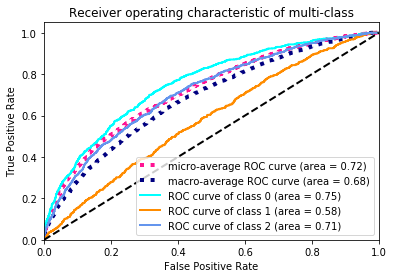

Fold:  2


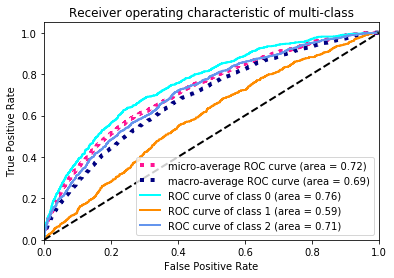

Fold:  3


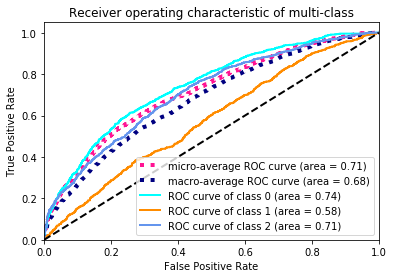

Fold:  4


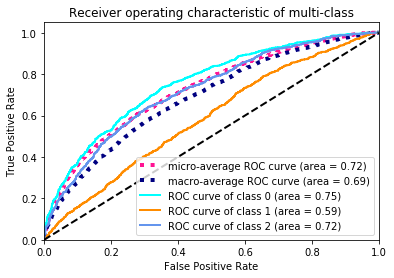

Fold:  5


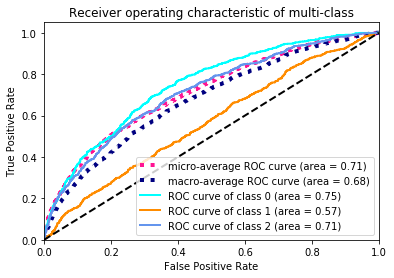

Fold:  6


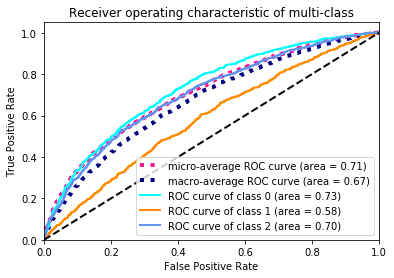

Fold:  7


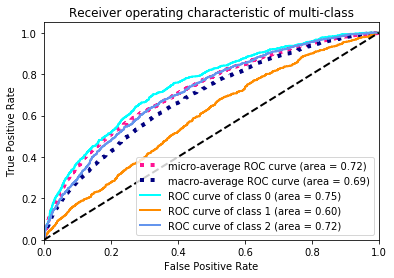

Fold:  8


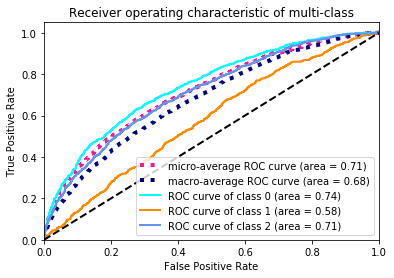

Fold:  9


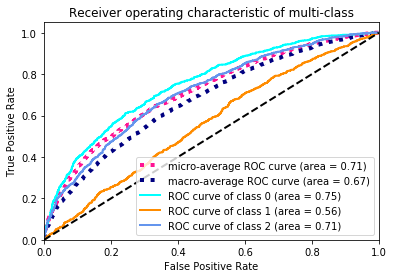

Fold:  10


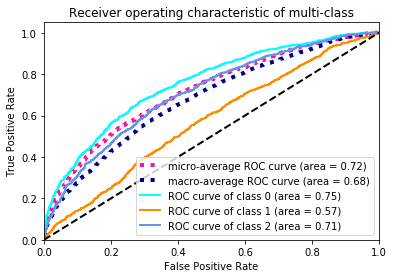

In [44]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

classifier=OneVsRestClassifier(pipeline3)
y = label_binarize(Y_data_wb_clean, classes=[0, 1, 2])
n_classes = y.shape[1]
count=1
lw = 2

for train_indices, test_indices in kf.split(X_data_wb_clean,Y_data_wb_clean):
    print('Fold: ', count)
    count=count+1
    y_score = classifier.fit(X_data_wb_clean.loc[train_indices], y[train_indices]).predict_proba(X_data_wb_clean.loc[test_indices])
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[test_indices, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y[test_indices].ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of multi-class')
    plt.legend(loc="lower right")
    plt.show()

## Classifier Chains

Fold:  1


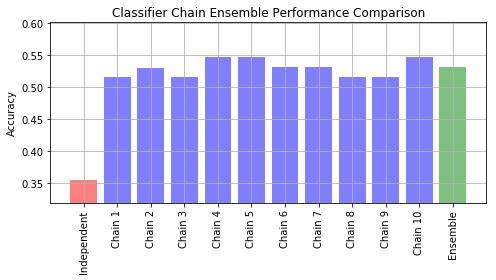

Fold:  2


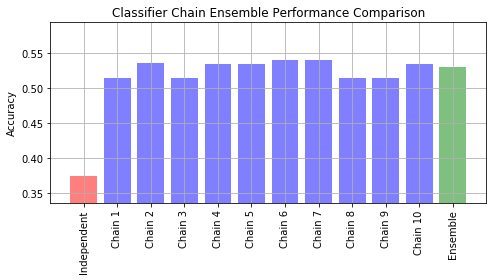

Fold:  3


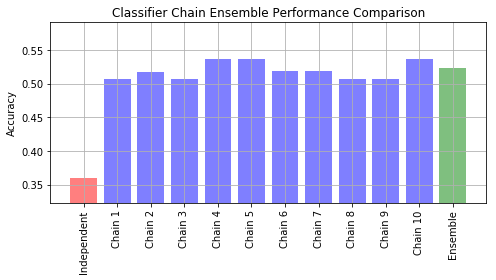

Fold:  4


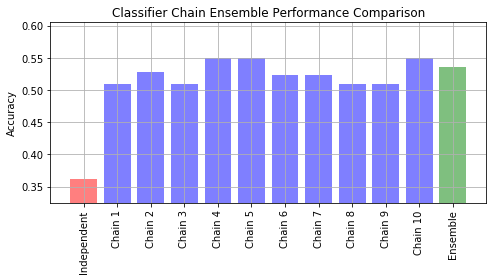

Fold:  5


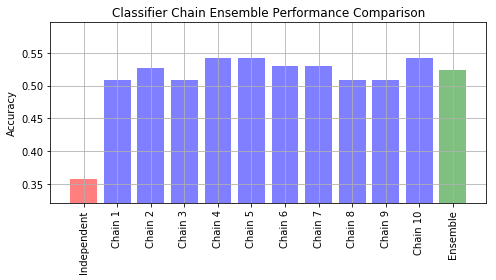

Fold:  6


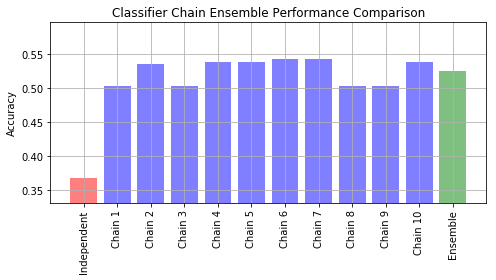

Fold:  7


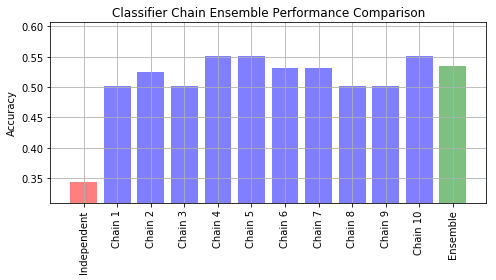

Fold:  8


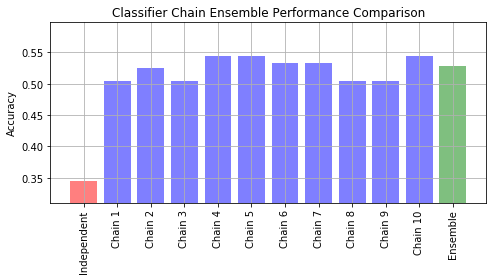

Fold:  9


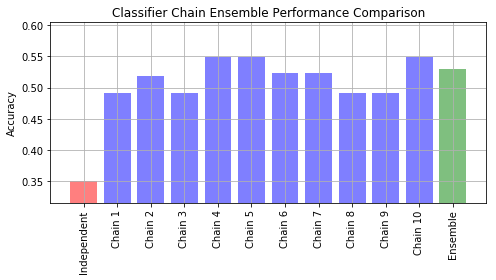

Fold:  10


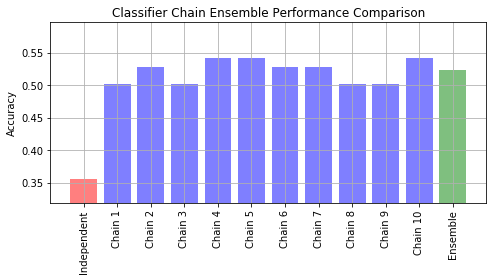

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import ClassifierChain

from sklearn.multiclass import OneVsRestClassifier


# OneVsRestClassifier wrapper.
ovr = OneVsRestClassifier(pipeline3)
pipeline3 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0001,
                   hidden_layer_sizes=(5, 5), random_state=1, activation='logistic', max_iter=301, verbose=True))])
y = label_binarize(Y_data_wb_clean, classes=[0, 1, 2])
count=1

kf = StratifiedShuffleSplit(n_splits=10, test_size = 0.2)
for train_indices, test_indices in kf.split(X_data_wb_clean,Y_data_wb_clean):
    print('Fold: ', count)
    count=count+1
    y_score = ovr.fit(X_data_wb_clean.loc[train_indices], y[train_indices]).predict(X_data_wb_clean.loc[test_indices])
    score=accuracy_score(y[test_indices],y_score)

    chains = [ClassifierChain(pipeline3, order='random',random_state=i) for i in range(10)]
    for chain in chains:
        chain.fit(X_data_wb_clean.loc[train_indices], y[train_indices])

    Y_pred_chains = np.array([chain.predict(X_data_wb_clean.loc[test_indices]) for chain in
                          chains])
    chain_accuracy_scores = [accuracy_score(y[test_indices],Y_pred_chain) for Y_pred_chain in Y_pred_chains]

    Y_pred_ensemble = Y_pred_chains.mean(axis=0)
    ensemble_accuracy_score = accuracy_score(y[test_indices],Y_pred_ensemble >=0.5)

    model_scores = [score] + chain_accuracy_scores
    model_scores.append(ensemble_accuracy_score)

    model_names = ('Independent',
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Chain 7',
               'Chain 8',
               'Chain 9',
               'Chain 10',
               'Ensemble')

    x_pos = np.arange(len(model_names))


    fig, ax = plt.subplots(figsize=(7, 4))
    ax.grid(True)
    ax.set_title('Classifier Chain Ensemble Performance Comparison')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(model_names, rotation='vertical')
    ax.set_ylabel('Accuracy')
    ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
    colors = ['r'] + ['b'] * len(chain_accuracy_scores) + ['g']
    ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
    plt.tight_layout()
    plt.show()

Turns out classifier chains of MLP does not improve much the accuracy. Let's try adding some other features that were scraped, such as team ratings!

### Let's add the team ratings that were scraped as features to the dataset

- No Bets as features
- Zeros in bmi and age not removed
- Team ratings added

In [113]:
dataset=pd.read_csv('FINAL_AWS_DATASET_TEAM_RATINGS.csv',index_col=0)
data_wb_clean = pd.read_csv('Data_Structures/FINAL_BASE_DATASET.csv',index_col=0)
columns=['home_team_rating','away_team_rating','home_team_offensive_rating',
         'away_team_offensive_rating','home_team_defensive_rating','away_team_defensive_rating']
# Drop metadata
META_COLUMNS=['match_api_id', 'home_team_api_id', 'away_team_api_id', 'season', 'date']
dataset = dataset.drop(META_COLUMNS, axis =1)
dataset_clean = dataset.dropna(axis = 0, how = 'any')
display(dataset.shape)
display(dataset_clean.shape)

## extracting the team ratings and adding them to our dataset we were using

final_dataset=pd.concat([data_wb_clean,dataset_clean[columns]],axis=1)
final_dataset_clean = final_dataset.dropna(axis = 0, how = 'any')
display(final_dataset.shape)
display(final_dataset_clean.shape)

(17369, 55)

(17359, 55)

(17359, 54)

(17359, 54)

In [107]:
final_dataset.to_csv('./Data_Structures/FINAL_BASE_DATASET_TEAM_RATINGS_ADDED_NO_BETS_ZEROS_NOT_REMOVED.csv')

In [157]:
X_data=final_dataset.drop(['Label'],axis=1)
Y_data=final_dataset['Label']

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2,random_state=0)
for train_index, test_index in s.split(X_data, Y_data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b, X_test_b = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_b, y_test_b = Y_data.iloc[train_index], Y_data.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b.shape[0]))
print ("Testing set has {} samples.".format(X_test_b.shape[0]))

Training set has 13887 samples.
Testing set has 3472 samples.


In [158]:
pipeline3 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0001,
                   hidden_layer_sizes=(5, 5), random_state=1, activation='logistic', max_iter=301))])
    
result= train_predict(pipeline3, X_train_b, y_train_b, X_test_b, y_test_b)

Pipeline trained.


In [159]:
result

{'acc_test': 0.55126728110599077,
 'acc_train': 0.51000000000000001,
 'f_test': 0.55126728110599077,
 'f_train': 0.51000000000000001,
 'train_time': 1.8811955451965332}

In [162]:
from sklearn.model_selection import StratifiedShuffleSplit

X = X_data.as_matrix().astype(np.float)
Y = Y_data.as_matrix().astype(np.float)


kf = StratifiedShuffleSplit(n_splits=10, test_size = 0.2,random_state=0)
count=1
score_test=[]
score_train=[]
for train_indices, test_indices in kf.split(X_data,Y_data):
    print('Fold: ', count)
    pipeline3.fit(X[train_indices], Y[train_indices])
    score_test.append(pipeline3.score(X[test_indices], Y[test_indices]))
    score_train.append(pipeline3.score(X[train_indices], Y[train_indices]))
    print('Testing score',pipeline3.score(X[test_indices], Y[test_indices]))
    print('Training score', pipeline3.score(X[train_indices], Y[train_indices]))
    count=count+1
print('........................')
print('Mean Testing Score', np.mean(score_test))
print('Mean Training Score', np.mean(score_train))

Fold:  1
Testing score 0.544066820276
Training score 0.546194282422
Fold:  2
Testing score 0.551267281106
Training score 0.539713401023
Fold:  3
Testing score 0.529953917051
Training score 0.550298840642
Fold:  4
Testing score 0.538882488479
Training score 0.543457910276
Fold:  5
Testing score 0.54349078341
Training score 0.551595016922
Fold:  6
Testing score 0.533410138249
Training score 0.544610066969
Fold:  7
Testing score 0.525921658986
Training score 0.545978253042
Fold:  8
Testing score 0.536290322581
Training score 0.543673939656
Fold:  9
Testing score 0.53168202765
Training score 0.548858644776
Fold:  10
Testing score 0.52448156682
Training score 0.551955065889
........................
Mean Testing Score 0.535944700461
Mean Training Score 0.546633542162


### Let's try tuning on this dataset

In [163]:

param_test1 = {
    'neural network__learning_rate_init': [i/1000.0 for i in range(1,50,5)],

}
gsearch1 = GridSearchCV(estimator = pipeline3, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.001},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.006},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.011},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.016},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.021},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.026},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.031},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.036},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.041},
  mean: 0.53294, std: 0.00208, params: {'neural network__learning_rate_init': 0.046}],
 {'neural network__learning_rate_init': 0.001},
 0.53294425013105062)

In [164]:

param_test2 = {
    'neural network__hidden_layer_sizes': [(n, min(n, 50)) for n in range(5, 50, 5)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline3, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b,y_train_b)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53294, std: 0.00208, params: {'neural network__hidden_layer_sizes': (5, 5)},
  mean: 0.53201, std: 0.00605, params: {'neural network__hidden_layer_sizes': (10, 10)},
  mean: 0.53251, std: 0.00101, params: {'neural network__hidden_layer_sizes': (15, 15)},
  mean: 0.53323, std: 0.00136, params: {'neural network__hidden_layer_sizes': (20, 20)},
  mean: 0.53345, std: 0.00161, params: {'neural network__hidden_layer_sizes': (25, 25)},
  mean: 0.53395, std: 0.00470, params: {'neural network__hidden_layer_sizes': (30, 30)},
  mean: 0.53496, std: 0.00218, params: {'neural network__hidden_layer_sizes': (35, 35)},
  mean: 0.53244, std: 0.00166, params: {'neural network__hidden_layer_sizes': (40, 40)},
  mean: 0.53323, std: 0.00150, params: {'neural network__hidden_layer_sizes': (45, 45)}],
 {'neural network__hidden_layer_sizes': (35, 35)},
 0.53496050897298442)

In [165]:
pipeline4 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0001,
                   hidden_layer_sizes=(35, 35), random_state=1, activation='logistic', max_iter=301))])
param_test3 = {
    'neural network__activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b,y_train_b)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53237, std: 0.00390, params: {'neural network__activation': 'identity'},
  mean: 0.53496, std: 0.00218, params: {'neural network__activation': 'logistic'},
  mean: 0.52171, std: 0.00431, params: {'neural network__activation': 'tanh'},
  mean: 0.52423, std: 0.00675, params: {'neural network__activation': 'relu'}],
 {'neural network__activation': 'logistic'},
 0.53496050897298442)

In [166]:
    
param_test4 = {
    'neural network__alpha': [i/10000.0 for i in range(1,50,5)]
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b,y_train_b)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53496, std: 0.00218, params: {'neural network__alpha': 0.0001},
  mean: 0.53381, std: 0.00314, params: {'neural network__alpha': 0.0006},
  mean: 0.53410, std: 0.00098, params: {'neural network__alpha': 0.0011},
  mean: 0.53561, std: 0.00029, params: {'neural network__alpha': 0.0016},
  mean: 0.53323, std: 0.00161, params: {'neural network__alpha': 0.0021},
  mean: 0.53402, std: 0.00207, params: {'neural network__alpha': 0.0026},
  mean: 0.53525, std: 0.00296, params: {'neural network__alpha': 0.0031},
  mean: 0.53266, std: 0.00712, params: {'neural network__alpha': 0.0036},
  mean: 0.53381, std: 0.00263, params: {'neural network__alpha': 0.0041},
  mean: 0.53287, std: 0.00555, params: {'neural network__alpha': 0.0046}],
 {'neural network__alpha': 0.0016},
 0.53560887724616357)

In [167]:
pipeline5 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(35, 35), random_state=1, activation='logistic', max_iter=301))])
param_test4 = {
    'neural network__solver': ['lbfgs', 'sgd', 'adam']
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b,y_train_b)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_





D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53561, std: 0.00029, params: {'neural network__solver': 'lbfgs'},
  mean: 0.45942, std: 0.00004, params: {'neural network__solver': 'sgd'},
  mean: 0.52906, std: 0.00430, params: {'neural network__solver': 'adam'}],
 {'neural network__solver': 'lbfgs'},
 0.53560887724616357)

In [168]:
param_test4 = {
    'neural network__max_iter': [i for i in range(100,600,100)]
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b,y_train_b)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52956, std: 0.00238, params: {'neural network__max_iter': 100},
  mean: 0.52978, std: 0.00270, params: {'neural network__max_iter': 200},
  mean: 0.53611, std: 0.00045, params: {'neural network__max_iter': 300},
  mean: 0.53006, std: 0.00184, params: {'neural network__max_iter': 400},
  mean: 0.52690, std: 0.00304, params: {'neural network__max_iter': 500}],
 {'neural network__max_iter': 300},
 0.53611288360817022)

In [169]:
param_test4 = {
    'neural network__max_iter': [i for i in range(300,400,10)]
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b,y_train_b)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53611, std: 0.00045, params: {'neural network__max_iter': 300},
  mean: 0.53662, std: 0.00053, params: {'neural network__max_iter': 310},
  mean: 0.53575, std: 0.00131, params: {'neural network__max_iter': 320},
  mean: 0.53511, std: 0.00310, params: {'neural network__max_iter': 330},
  mean: 0.53374, std: 0.00180, params: {'neural network__max_iter': 340},
  mean: 0.53179, std: 0.00259, params: {'neural network__max_iter': 350},
  mean: 0.52985, std: 0.00115, params: {'neural network__max_iter': 360},
  mean: 0.53086, std: 0.00158, params: {'neural network__max_iter': 370},
  mean: 0.53086, std: 0.00109, params: {'neural network__max_iter': 380},
  mean: 0.52913, std: 0.00131, params: {'neural network__max_iter': 390}],
 {'neural network__max_iter': 310},
 0.53661688997017698)

In [170]:
param_test4 = {
    'neural network__max_iter': [i for i in range(300,310)]
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=3)

gsearch2.fit(X_train_b,y_train_b)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53611, std: 0.00045, params: {'neural network__max_iter': 300},
  mean: 0.53561, std: 0.00029, params: {'neural network__max_iter': 301},
  mean: 0.53510, std: 0.00038, params: {'neural network__max_iter': 302},
  mean: 0.53654, std: 0.00198, params: {'neural network__max_iter': 303},
  mean: 0.53705, std: 0.00153, params: {'neural network__max_iter': 304},
  mean: 0.53669, std: 0.00049, params: {'neural network__max_iter': 305},
  mean: 0.53669, std: 0.00039, params: {'neural network__max_iter': 306},
  mean: 0.53647, std: 0.00141, params: {'neural network__max_iter': 307},
  mean: 0.53727, std: 0.00085, params: {'neural network__max_iter': 308},
  mean: 0.53669, std: 0.00144, params: {'neural network__max_iter': 309}],
 {'neural network__max_iter': 308},
 0.53726530492213742)

In [173]:
pipeline6 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(35, 35), random_state=1, activation='logistic', max_iter=308))])
    
result= train_predict(pipeline6, X_train_b, y_train_b, X_test_b, y_test_b)

Pipeline trained.


In [174]:
result

{'acc_test': 0.55472350230414746,
 'acc_train': 0.52000000000000002,
 'f_test': 0.55472350230414746,
 'f_train': 0.52000000000000002,
 'train_time': 8.7573881149292}

#### Using this dataset, and after tuning the MLP, we can see that the accuracy score increased slightly resulting in an accuracy of ~55.47%

### Let's check if it's overfitting

In [175]:
from sklearn.model_selection import StratifiedShuffleSplit

X = X_data.as_matrix().astype(np.float)
Y = Y_data.as_matrix().astype(np.float)


kf = StratifiedShuffleSplit(n_splits=10, test_size = 0.2,random_state=0)
count=1
score_test=[]
score_train=[]
for train_indices, test_indices in kf.split(X_data,Y_data):
    print('Fold: ', count)
    pipeline3.fit(X[train_indices], Y[train_indices])
    score_test.append(pipeline6.score(X[test_indices], Y[test_indices]))
    score_train.append(pipeline6.score(X[train_indices], Y[train_indices]))
    print('Testing score',pipeline6.score(X[test_indices], Y[test_indices]))
    print('Training score', pipeline6.score(X[train_indices], Y[train_indices]))
    count=count+1
print('........................')
print('Mean Testing Score', np.mean(score_test))
print('Mean Training Score', np.mean(score_train))

Fold:  1
Testing score 0.548675115207
Training score 0.547922517462
Fold:  2
Testing score 0.554723502304
Training score 0.546410311802
Fold:  3
Testing score 0.542626728111
Training score 0.549434723122
Fold:  4
Testing score 0.556451612903
Training score 0.545978253042
Fold:  5
Testing score 0.551267281106
Training score 0.547274429322
Fold:  6
Testing score 0.547235023041
Training score 0.548282566429
Fold:  7
Testing score 0.542338709677
Training score 0.549506732916
Fold:  8
Testing score 0.551555299539
Training score 0.547202419529
Fold:  9
Testing score 0.541186635945
Training score 0.549794772089
Fold:  10
Testing score 0.536866359447
Training score 0.550874918989
........................
Mean Testing Score 0.547292626728
Mean Training Score 0.54826816447


### Let's try out ROC for this dataset (same as before)

Fold:  1


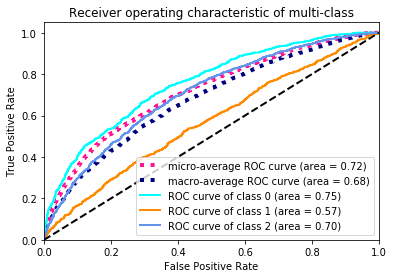

Fold:  2


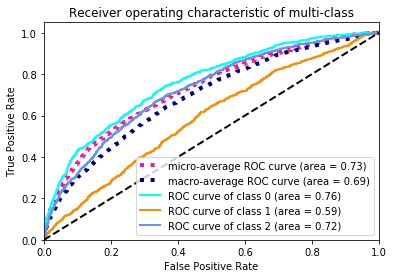

Fold:  3


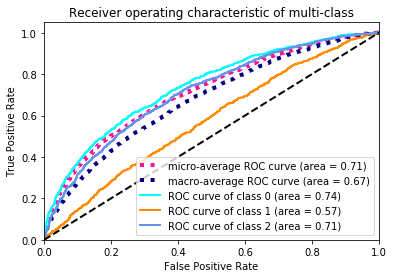

Fold:  4


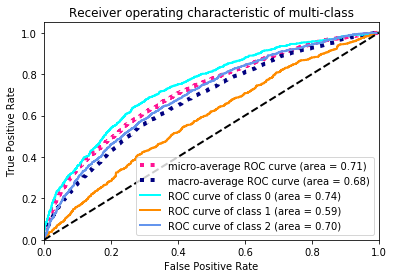

Fold:  5


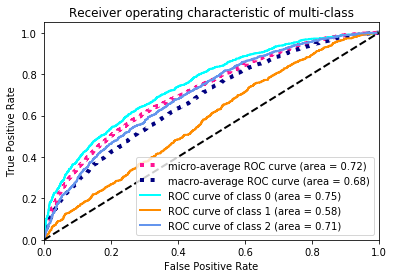

Fold:  6


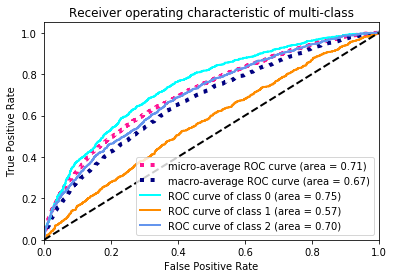

Fold:  7


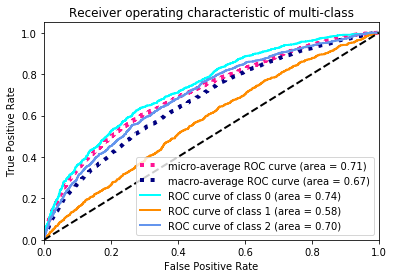

Fold:  8


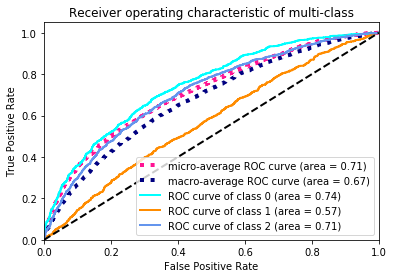

Fold:  9


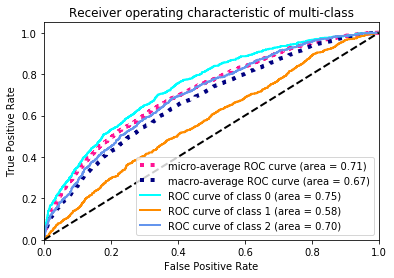

Fold:  10


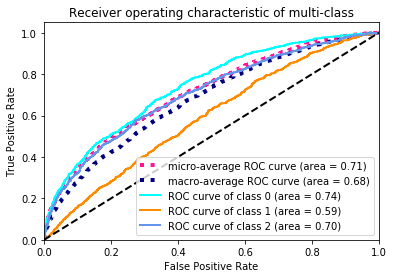

In [178]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

X = X_data.as_matrix().astype(np.float)
Y = Y_data.as_matrix().astype(np.float)

classifier=OneVsRestClassifier(pipeline6)
y = label_binarize(Y, classes=[0, 1, 2])
n_classes = y.shape[1]
count=1
lw = 2

for train_indices, test_indices in kf.split(X,Y):
    print('Fold: ', count)
    count=count+1
    y_score = classifier.fit(X[train_indices], y[train_indices]).predict_proba(X[test_indices])
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[test_indices, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y[test_indices].ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic of multi-class')
    plt.legend(loc="lower right")
    plt.show()

### Let's add the team ratings that were scraped as features to the dataset but with the zeros removed

In [6]:
import pandas as pd
dataset=pd.read_csv('FINAL_AWS_DATASET_TEAM_RATINGS_NO_ZEROS.csv',index_col=0)
data_wb_clean = pd.read_csv('FINAL_BASE_DATASET.csv',index_col=0)
columns=['home_team_rating','away_team_rating','home_team_offensive_rating',
         'away_team_offensive_rating','home_team_defensive_rating','away_team_defensive_rating']
# Drop metadata
META_COLUMNS=['match_api_id', 'home_team_api_id', 'away_team_api_id', 'season', 'date']
dataset = dataset.drop(META_COLUMNS, axis =1)
dataset_clean = dataset.dropna(axis = 0, how = 'any')
display(dataset.shape)
display(dataset_clean.shape)

## extracting the team ratings and adding them to our dataset we were using

final_dataset=pd.concat([data_wb_clean,dataset_clean[columns]],axis=1)
final_dataset_clean = final_dataset.dropna(axis = 0, how = 'any')
display(final_dataset.shape)
display(final_dataset_clean.shape)

(17369, 55)

(17359, 55)

(17359, 54)

(17359, 54)

In [7]:
final_dataset.to_csv('FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED.csv')

In [15]:
X_data=final_dataset.drop(['Label'],axis=1)
Y_data=final_dataset['Label']

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2,random_state=0)
for train_index, test_index in s.split(X_data, Y_data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b, X_test_b = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_b, y_test_b = Y_data.iloc[train_index], Y_data.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b.shape[0]))
print ("Testing set has {} samples.".format(X_test_b.shape[0]))

Training set has 13887 samples.
Testing set has 3472 samples.


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline6 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(35, 35), random_state=1, activation='logistic', max_iter=308))])
    
result= train_predict(pipeline6, X_train_b, y_train_b, X_test_b, y_test_b)

Pipeline trained.


In [17]:
result

{'acc_test': 0.55241935483870963,
 'acc_train': 0.49666666666666665,
 'f_test': 0.55241935483870963,
 'f_train': 0.49666666666666665,
 'train_time': 9.791702270507812}

## Let's try now taking the latest season (15/16) as test data and the previous seasons as training data and rerun our models! 

### Our aim is to have a model that can predict the outcome of matches in the next season given information from previous seasons

In [2]:
import pandas as pd
final_dataset=pd.read_csv('FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED_WITH_SEASON.csv')

In [3]:
from collections import Counter
Counter(final_dataset['season'])

Counter({'2008/2009': 1407,
         '2009/2010': 1885,
         '2010/2011': 1986,
         '2011/2012': 2242,
         '2012/2013': 2378,
         '2013/2014': 2297,
         '2014/2015': 2628,
         '2015/2016': 2536})

In [4]:
## Extract season 2015/2016 matches as test data
this_season='2015/2016'
test_data=final_dataset[final_dataset['season']==this_season]
train_data=final_dataset.drop(test_data.index)

In [5]:
X_train=train_data.drop(['season','Label'],axis=1)
Y_train=train_data['Label']

X_test=test_data.drop(['season','Label'],axis=1)
Y_test=test_data['Label']


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

pipeline6 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(35, 35), random_state=1, activation='logistic', max_iter=308))])
    
result= train_predict(pipeline6, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [11]:
result

{'acc_test': 0.48619873817034698,
 'acc_train': 0.58333333333333337,
 'f_test': 0.48619873817034698,
 'f_train': 0.58333333333333337,
 'train_time': 11.226175785064697}

### Let's try tuning!

In [50]:
from sklearn.model_selection import GridSearchCV

param_test2 = {
    'neural network__hidden_layer_sizes': [(n, min(n, 50)) for n in range(5, 50, 5)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline6, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54227, std: 0.02302, params: {'neural network__hidden_layer_sizes': (5, 5)},
  mean: 0.54389, std: 0.02305, params: {'neural network__hidden_layer_sizes': (10, 10)},
  mean: 0.54213, std: 0.02033, params: {'neural network__hidden_layer_sizes': (15, 15)},
  mean: 0.54281, std: 0.02186, params: {'neural network__hidden_layer_sizes': (20, 20)},
  mean: 0.54901, std: 0.02041, params: {'neural network__hidden_layer_sizes': (25, 25)},
  mean: 0.54530, std: 0.02220, params: {'neural network__hidden_layer_sizes': (30, 30)},
  mean: 0.54429, std: 0.02232, params: {'neural network__hidden_layer_sizes': (35, 35)},
  mean: 0.54982, std: 0.02110, params: {'neural network__hidden_layer_sizes': (40, 40)},
  mean: 0.54449, std: 0.01767, params: {'neural network__hidden_layer_sizes': (45, 45)}],
 {'neural network__hidden_layer_sizes': (40, 40)},
 0.54982379221161559)

In [51]:
from sklearn.model_selection import GridSearchCV

param_test2 = {
    'neural network__hidden_layer_sizes': [(n, min(n, 70)) for n in range(40, 70, 5)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline6, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54982, std: 0.02110, params: {'neural network__hidden_layer_sizes': (40, 40)},
  mean: 0.54449, std: 0.01767, params: {'neural network__hidden_layer_sizes': (45, 45)},
  mean: 0.54679, std: 0.01867, params: {'neural network__hidden_layer_sizes': (50, 50)},
  mean: 0.54254, std: 0.02010, params: {'neural network__hidden_layer_sizes': (55, 55)},
  mean: 0.54341, std: 0.01973, params: {'neural network__hidden_layer_sizes': (60, 60)},
  mean: 0.54328, std: 0.02021, params: {'neural network__hidden_layer_sizes': (65, 65)}],
 {'neural network__hidden_layer_sizes': (40, 40)},
 0.54982379221161559)

In [52]:
pipeline4 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(40, 40), random_state=1, activation='logistic', max_iter=308))])
param_test3 = {
    'neural network__activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54490, std: 0.01858, params: {'neural network__activation': 'identity'},
  mean: 0.54982, std: 0.02110, params: {'neural network__activation': 'logistic'},
  mean: 0.52116, std: 0.02412, params: {'neural network__activation': 'tanh'},
  mean: 0.53721, std: 0.02233, params: {'neural network__activation': 'relu'}],
 {'neural network__activation': 'logistic'},
 0.54982379221161559)

In [53]:
    
param_test4 = {
    'neural network__alpha': [i/10000.0 for i in range(1,50,5)]
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54780, std: 0.02092, params: {'neural network__alpha': 0.0001},
  mean: 0.55063, std: 0.01909, params: {'neural network__alpha': 0.0006},
  mean: 0.54935, std: 0.02342, params: {'neural network__alpha': 0.0011},
  mean: 0.54982, std: 0.02110, params: {'neural network__alpha': 0.0016},
  mean: 0.54908, std: 0.02317, params: {'neural network__alpha': 0.0021},
  mean: 0.54665, std: 0.02194, params: {'neural network__alpha': 0.0026},
  mean: 0.55009, std: 0.02240, params: {'neural network__alpha': 0.0031},
  mean: 0.55023, std: 0.02438, params: {'neural network__alpha': 0.0036},
  mean: 0.55198, std: 0.02311, params: {'neural network__alpha': 0.0041},
  mean: 0.54557, std: 0.02572, params: {'neural network__alpha': 0.0046}],
 {'neural network__alpha': 0.0041},
 0.55198328725542667)

In [54]:
pipeline5 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0041,
                   hidden_layer_sizes=(40, 40), random_state=1, activation='logistic', max_iter=308))])
param_test4 = {
    'neural network__solver': ['lbfgs', 'sgd', 'adam']
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55198, std: 0.02311, params: {'neural network__solver': 'lbfgs'},
  mean: 0.46320, std: 0.00012, params: {'neural network__solver': 'sgd'},
  mean: 0.54051, std: 0.01793, params: {'neural network__solver': 'adam'}],
 {'neural network__solver': 'lbfgs'},
 0.55198328725542667)

In [55]:
param_test4 = {
    'neural network__max_iter': [i for i in range(100,600,100)]
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54112, std: 0.01919, params: {'neural network__max_iter': 100},
  mean: 0.54436, std: 0.01637, params: {'neural network__max_iter': 200},
  mean: 0.55050, std: 0.02091, params: {'neural network__max_iter': 300},
  mean: 0.54497, std: 0.02330, params: {'neural network__max_iter': 400},
  mean: 0.53896, std: 0.02165, params: {'neural network__max_iter': 500}],
 {'neural network__max_iter': 300},
 0.55049880657792261)

In [56]:
param_test4 = {
    'neural network__max_iter': [i for i in range(300,400,10)]
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55050, std: 0.02091, params: {'neural network__max_iter': 300},
  mean: 0.55070, std: 0.02247, params: {'neural network__max_iter': 310},
  mean: 0.55138, std: 0.02179, params: {'neural network__max_iter': 320},
  mean: 0.55151, std: 0.02149, params: {'neural network__max_iter': 330},
  mean: 0.55198, std: 0.02071, params: {'neural network__max_iter': 340},
  mean: 0.54868, std: 0.02359, params: {'neural network__max_iter': 350},
  mean: 0.54638, std: 0.02372, params: {'neural network__max_iter': 360},
  mean: 0.54746, std: 0.02257, params: {'neural network__max_iter': 370},
  mean: 0.54706, std: 0.02172, params: {'neural network__max_iter': 380},
  mean: 0.54726, std: 0.01985, params: {'neural network__max_iter': 390}],
 {'neural network__max_iter': 340},
 0.5519827864185789)

In [14]:
from sklearn.model_selection import GridSearchCV

pipeline5 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0041,
                   hidden_layer_sizes=(40, 40), random_state=1, activation='logistic', max_iter=308))])
param_test4 = {
    'neural network__max_iter': [i for i in range(340,350)]
}

gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_




D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.55198, std: 0.02071, params: {'neural network__max_iter': 340},
  mean: 0.55111, std: 0.02213, params: {'neural network__max_iter': 341},
  mean: 0.55043, std: 0.02130, params: {'neural network__max_iter': 342},
  mean: 0.55131, std: 0.02177, params: {'neural network__max_iter': 343},
  mean: 0.55030, std: 0.02188, params: {'neural network__max_iter': 344},
  mean: 0.55016, std: 0.02062, params: {'neural network__max_iter': 345},
  mean: 0.54989, std: 0.02079, params: {'neural network__max_iter': 346},
  mean: 0.54989, std: 0.02086, params: {'neural network__max_iter': 347},
  mean: 0.55097, std: 0.02211, params: {'neural network__max_iter': 348},
  mean: 0.54895, std: 0.02306, params: {'neural network__max_iter': 349}],
 {'neural network__max_iter': 340},
 0.5519827864185789)

In [19]:
pipeline5 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0041,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='logistic', max_iter=340))])

result= train_predict(pipeline5, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [20]:
result

{'acc_test': 0.48541009463722395,
 'acc_train': 0.57666666666666666,
 'f_test': 0.48541009463722395,
 'f_train': 0.57666666666666666,
 'train_time': 23.157593727111816}

### Let's try removing some seasons from the training set, to check how far in the past should we go to predict the future

In [165]:
import pandas as pd
final_dataset=pd.read_csv('FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED_WITH_SEASON.csv')

In [166]:
## Extract season 2015/2016 matches as test data
this_season='2015/2016'
test_data=final_dataset[final_dataset['season']==this_season]
train_data=final_dataset.drop(test_data.index)

In [167]:
from collections import Counter
display(Counter(train_data['season']))
display(Counter(test_data['season']))

Counter({'2008/2009': 1407,
         '2009/2010': 1885,
         '2010/2011': 1986,
         '2011/2012': 2242,
         '2012/2013': 2378,
         '2013/2014': 2297,
         '2014/2015': 2628})

Counter({'2015/2016': 2536})

#### Let's start by using the two most recent seasons in the training set (2014/2015 and 2013/2014) and then start adding previous seasons and test it's effect on prediction

In [77]:

def train_test_dynamically_adding_seasons(clf,train_data,test_data, seasons_to_use):
    train_data=train_data[train_data['season'].isin(seasons_to_use)]
    display('Size of training dataset: ', train_data.shape[0])
    X_train=train_data.drop(['season','Label'],axis=1)
    Y_train=train_data['Label']

    X_test=test_data.drop(['season','Label'],axis=1)
    Y_test=test_data['Label']

    result= train_predict(clf, X_train, Y_train, X_test, Y_test)
    return result

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

pipeline6 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(35, 35), random_state=1, activation='logistic', max_iter=308))])

seasons_to_use=[]
seasons_used=[]
results_saved=[]
count=0
for season in np.flip(np.sort(train_data['season'].unique()),axis=0):
    seasons_to_use.append(season)
    print('Using seasons: ', seasons_to_use)
    result=train_test_dynamically_adding_seasons(pipeline6,train_data,test_data,seasons_to_use)
    results_saved.append(result)
    print(result)
    print('........................................')
    #seasons_used[count].append[seasons_to_use]
    count=count+1

Using seasons:  ['2014/2015']


'Size of training dataset: '

2628

Pipeline trained.
{'train_time': 1.38580322265625, 'acc_train': 0.59999999999999998, 'acc_test': 0.46924290220820192, 'f_train': 0.59999999999999998, 'f_test': 0.46924290220820192}
........................................
Using seasons:  ['2014/2015', '2013/2014']


'Size of training dataset: '

4925

Pipeline trained.
{'train_time': 3.399571180343628, 'acc_train': 0.54000000000000004, 'acc_test': 0.48304416403785488, 'f_train': 0.54000000000000004, 'f_test': 0.48304416403785488}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013']


'Size of training dataset: '

7303

Pipeline trained.
{'train_time': 4.714118480682373, 'acc_train': 0.56999999999999995, 'acc_test': 0.48501577287066244, 'f_train': 0.56999999999999995, 'f_test': 0.48501577287066244}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012']


'Size of training dataset: '

9545

Pipeline trained.
{'train_time': 6.223610877990723, 'acc_train': 0.57999999999999996, 'acc_test': 0.4885646687697161, 'f_train': 0.57999999999999996, 'f_test': 0.4885646687697161}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011']


'Size of training dataset: '

11531

Pipeline trained.
{'train_time': 7.741926431655884, 'acc_train': 0.56000000000000005, 'acc_test': 0.48738170347003157, 'f_train': 0.56000000000000005, 'f_test': 0.48738170347003157}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010']


'Size of training dataset: '

13416

Pipeline trained.
{'train_time': 8.641739130020142, 'acc_train': 0.57666666666666666, 'acc_test': 0.48501577287066244, 'f_train': 0.57666666666666666, 'f_test': 0.48501577287066244}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010', '2008/2009']


'Size of training dataset: '

14823

Pipeline trained.
{'train_time': 9.438687801361084, 'acc_train': 0.58333333333333337, 'acc_test': 0.48619873817034698, 'f_train': 0.58333333333333337, 'f_test': 0.48619873817034698}
........................................


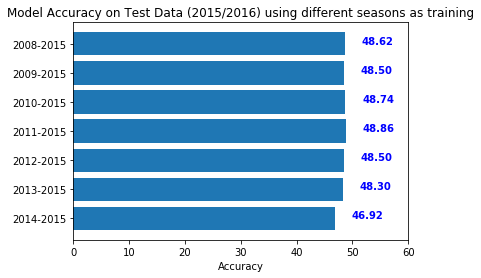

In [157]:
## plot the accuracy for the different scenarios above
import matplotlib.pyplot as plt

objects = ('2014-2015', '2013-2015', '2012-2015', '2011-2015', '2010-2015', '2009-2015','2008-2015')
y_pos = np.arange(len(objects))
r=[]
for i in range(len(results_saved)):
    r.append(results_saved[i]['acc_test']*100)
#display(r)
plt.barh(y_pos, r, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Model Accuracy on Test Data (2015/2016) using different seasons as training')
plt.xlim((0,60))

for i, v in enumerate(r):
    plt.text(v + 3, i, str('%.2f' %v), color='blue', fontweight='bold')
    
plt.show()


#### Let's try tuning the model on the training dataset that includes seasons 2011-2015

In [13]:
seasons_to_use=['2014/2015', '2013/2014', '2012/2013', '2011/2012']
train_data=train_data[train_data['season'].isin(seasons_to_use)]
display('Size of training dataset: ', train_data.shape[0])
X_train=train_data.drop(['season','Label'],axis=1)
Y_train=train_data['Label']

X_test=test_data.drop(['season','Label'],axis=1)
Y_test=test_data['Label']

'Size of training dataset: '

9545

In [161]:
from sklearn.model_selection import GridSearchCV

param_test2 = {
    'neural network__hidden_layer_sizes': [(n, min(n, 60)) for n in range(5, 60, 5)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline6, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52656, std: 0.00829, params: {'neural network__hidden_layer_sizes': (5, 5)},
  mean: 0.53044, std: 0.00877, params: {'neural network__hidden_layer_sizes': (10, 10)},
  mean: 0.52101, std: 0.01630, params: {'neural network__hidden_layer_sizes': (15, 15)},
  mean: 0.52153, std: 0.00809, params: {'neural network__hidden_layer_sizes': (20, 20)},
  mean: 0.51703, std: 0.01848, params: {'neural network__hidden_layer_sizes': (25, 25)},
  mean: 0.52415, std: 0.01112, params: {'neural network__hidden_layer_sizes': (30, 30)},
  mean: 0.51483, std: 0.01978, params: {'neural network__hidden_layer_sizes': (35, 35)},
  mean: 0.53023, std: 0.01657, params: {'neural network__hidden_layer_sizes': (40, 40)},
  mean: 0.53243, std: 0.01149, params: {'neural network__hidden_layer_sizes': (45, 45)},
  mean: 0.52834, std: 0.01175, params: {'neural network__hidden_layer_sizes': (50, 50)},
  mean: 0.52133, std: 0.02099, params: {'neural network__hidden_layer_sizes': (55, 55)}],
 {'neural network__hid

In [162]:
pipeline4 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='logistic', max_iter=308))])
param_test3 = {
    'neural network__activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53473, std: 0.01347, params: {'neural network__activation': 'identity'},
  mean: 0.53243, std: 0.01149, params: {'neural network__activation': 'logistic'},
  mean: 0.48488, std: 0.04100, params: {'neural network__activation': 'tanh'},
  mean: 0.48268, std: 0.04953, params: {'neural network__activation': 'relu'}],
 {'neural network__activation': 'identity'},
 0.53473424705752748)

In [169]:
pipeline4 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='identity', max_iter=308))])
param_test4 = {
    'neural network__alpha': [i/10000.0 for i in range(1,50,5)]
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53432, std: 0.01315, params: {'neural network__alpha': 0.0001},
  mean: 0.53473, std: 0.01438, params: {'neural network__alpha': 0.0006},
  mean: 0.53536, std: 0.01422, params: {'neural network__alpha': 0.0011},
  mean: 0.53473, std: 0.01347, params: {'neural network__alpha': 0.0016},
  mean: 0.53515, std: 0.01385, params: {'neural network__alpha': 0.0021},
  mean: 0.53515, std: 0.01414, params: {'neural network__alpha': 0.0026},
  mean: 0.53473, std: 0.01362, params: {'neural network__alpha': 0.0031},
  mean: 0.53515, std: 0.01381, params: {'neural network__alpha': 0.0036},
  mean: 0.53536, std: 0.01324, params: {'neural network__alpha': 0.0041},
  mean: 0.53442, std: 0.01366, params: {'neural network__alpha': 0.0046}],
 {'neural network__alpha': 0.0011},
 0.53536334260304819)

In [171]:
pipeline5 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0011,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='identity', max_iter=308))])
param_test4 = {
    'neural network__solver': ['lbfgs', 'sgd', 'adam']
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53536, std: 0.01422, params: {'neural network__solver': 'lbfgs'},
  mean: 0.53096, std: 0.01648, params: {'neural network__solver': 'sgd'},
  mean: 0.52845, std: 0.01717, params: {'neural network__solver': 'adam'}],
 {'neural network__solver': 'lbfgs'},
 0.53536334260304819)

In [176]:
param_test4 = {
    'neural network__max_iter': [i for i in range(300,310)]
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53421, std: 0.01489, params: {'neural network__max_iter': 300},
  mean: 0.53442, std: 0.01504, params: {'neural network__max_iter': 301},
  mean: 0.53442, std: 0.01504, params: {'neural network__max_iter': 302},
  mean: 0.53442, std: 0.01456, params: {'neural network__max_iter': 303},
  mean: 0.53515, std: 0.01454, params: {'neural network__max_iter': 304},
  mean: 0.53547, std: 0.01436, params: {'neural network__max_iter': 305},
  mean: 0.53557, std: 0.01420, params: {'neural network__max_iter': 306},
  mean: 0.53536, std: 0.01422, params: {'neural network__max_iter': 307},
  mean: 0.53536, std: 0.01422, params: {'neural network__max_iter': 308},
  mean: 0.53494, std: 0.01445, params: {'neural network__max_iter': 309}],
 {'neural network__max_iter': 306},
 0.535572876447868)

In [14]:
pipeline5 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0011,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='identity', max_iter=308))])

result= train_predict(pipeline5, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [15]:
result

{'acc_test': 0.49447949526813878,
 'acc_train': 0.53333333333333333,
 'f_test': 0.49447949526813878,
 'f_train': 0.53333333333333333,
 'train_time': 4.52111554145813}

### Trying a different scaler

In [16]:
from sklearn.preprocessing import StandardScaler

pipeline5 = Pipeline([
        ('min/max scaler', StandardScaler()),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0011,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='identity', max_iter=308))])

result= train_predict(pipeline5, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [17]:
result

{'acc_test': 0.49369085173501576,
 'acc_train': 0.53666666666666663,
 'f_test': 0.49369085173501576,
 'f_train': 0.53666666666666663,
 'train_time': 1.3601479530334473}

#### Let's try tuning

In [18]:
from sklearn.model_selection import GridSearchCV

param_test2 = {
    'neural network__hidden_layer_sizes': [(n, min(n, 60)) for n in range(5, 60, 5)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53620, std: 0.01356, params: {'neural network__hidden_layer_sizes': (5, 5)},
  mean: 0.53568, std: 0.01412, params: {'neural network__hidden_layer_sizes': (10, 10)},
  mean: 0.53568, std: 0.01347, params: {'neural network__hidden_layer_sizes': (15, 15)},
  mean: 0.53505, std: 0.01359, params: {'neural network__hidden_layer_sizes': (20, 20)},
  mean: 0.53494, std: 0.01359, params: {'neural network__hidden_layer_sizes': (25, 25)},
  mean: 0.53463, std: 0.01267, params: {'neural network__hidden_layer_sizes': (30, 30)},
  mean: 0.53484, std: 0.01423, params: {'neural network__hidden_layer_sizes': (35, 35)},
  mean: 0.53505, std: 0.01374, params: {'neural network__hidden_layer_sizes': (40, 40)},
  mean: 0.53494, std: 0.01325, params: {'neural network__hidden_layer_sizes': (45, 45)},
  mean: 0.53568, std: 0.01332, params: {'neural network__hidden_layer_sizes': (50, 50)},
  mean: 0.53568, std: 0.01324, params: {'neural network__hidden_layer_sizes': (55, 55)}],
 {'neural network__hid

In [20]:
from sklearn.model_selection import GridSearchCV

param_test2 = {
    'neural network__hidden_layer_sizes': [(n, min(n, 6)) for n in range(1, 6)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53610, std: 0.01191, params: {'neural network__hidden_layer_sizes': (1, 1)},
  mean: 0.53515, std: 0.01351, params: {'neural network__hidden_layer_sizes': (2, 2)},
  mean: 0.53589, std: 0.01430, params: {'neural network__hidden_layer_sizes': (3, 3)},
  mean: 0.53672, std: 0.01404, params: {'neural network__hidden_layer_sizes': (4, 4)},
  mean: 0.53620, std: 0.01356, params: {'neural network__hidden_layer_sizes': (5, 5)}],
 {'neural network__hidden_layer_sizes': (4, 4)},
 0.53672344605217615)

In [22]:
pipeline4 = Pipeline([
        ('min/max scaler',StandardScaler()),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0011,
                   hidden_layer_sizes=(4, 4), random_state=1, activation='identity', max_iter=308))])
param_test3 = {
    'neural network__activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53672, std: 0.01404, params: {'neural network__activation': 'identity'},
  mean: 0.51545, std: 0.01591, params: {'neural network__activation': 'logistic'},
  mean: 0.48718, std: 0.04263, params: {'neural network__activation': 'tanh'},
  mean: 0.52908, std: 0.01133, params: {'neural network__activation': 'relu'}],
 {'neural network__activation': 'identity'},
 0.53672344605217615)

In [23]:

param_test4 = {
    'neural network__alpha': [i/10000.0 for i in range(1,50,5)]
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53630, std: 0.01387, params: {'neural network__alpha': 0.0001},
  mean: 0.53651, std: 0.01322, params: {'neural network__alpha': 0.0006},
  mean: 0.53672, std: 0.01404, params: {'neural network__alpha': 0.0011},
  mean: 0.53609, std: 0.01359, params: {'neural network__alpha': 0.0016},
  mean: 0.53672, std: 0.01390, params: {'neural network__alpha': 0.0021},
  mean: 0.53609, std: 0.01393, params: {'neural network__alpha': 0.0026},
  mean: 0.53630, std: 0.01394, params: {'neural network__alpha': 0.0031},
  mean: 0.53589, std: 0.01291, params: {'neural network__alpha': 0.0036},
  mean: 0.53630, std: 0.01438, params: {'neural network__alpha': 0.0041},
  mean: 0.53672, std: 0.01351, params: {'neural network__alpha': 0.0046}],
 {'neural network__alpha': 0.0021},
 0.53672377568066831)

In [25]:
pipeline5 = Pipeline([
        ('min/max scaler', StandardScaler()),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0021,
                   hidden_layer_sizes=(4, 4), random_state=1, activation='identity', max_iter=308))])
param_test4 = {
    'neural network__solver': ['lbfgs', 'sgd', 'adam']
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53672, std: 0.01390, params: {'neural network__solver': 'lbfgs'},
  mean: 0.53295, std: 0.01210, params: {'neural network__solver': 'sgd'},
  mean: 0.53421, std: 0.01539, params: {'neural network__solver': 'adam'}],
 {'neural network__solver': 'lbfgs'},
 0.53672377568066831)

In [29]:
param_test4 = {
    'neural network__max_iter': [i for i in range(320,330)]
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53672, std: 0.01398, params: {'neural network__max_iter': 320},
  mean: 0.53662, std: 0.01390, params: {'neural network__max_iter': 321},
  mean: 0.53641, std: 0.01385, params: {'neural network__max_iter': 322},
  mean: 0.53672, std: 0.01381, params: {'neural network__max_iter': 323},
  mean: 0.53651, std: 0.01374, params: {'neural network__max_iter': 324},
  mean: 0.53651, std: 0.01398, params: {'neural network__max_iter': 325},
  mean: 0.53641, std: 0.01387, params: {'neural network__max_iter': 326},
  mean: 0.53630, std: 0.01375, params: {'neural network__max_iter': 327},
  mean: 0.53620, std: 0.01358, params: {'neural network__max_iter': 328},
  mean: 0.53599, std: 0.01363, params: {'neural network__max_iter': 329}],
 {'neural network__max_iter': 323},
 0.53672383047485794)

In [45]:
pipeline5 = Pipeline([
        ('min/max scaler', StandardScaler()),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0021,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='identity', max_iter=323))])

result= train_predict(pipeline5, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [46]:
result

{'acc_test': 0.49447949526813878,
 'acc_train': 0.53666666666666663,
 'f_test': 0.49447949526813878,
 'f_train': 0.53666666666666663,
 'train_time': 1.3059959411621094}

#### Let's add PCA

In [54]:
from sklearn.decomposition import PCA

pipeline5 = Pipeline([
        ('min/max scaler', StandardScaler()),
        ('pca', PCA()),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0021,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='identity', max_iter=323))])

result= train_predict(pipeline5, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [55]:
result

{'acc_test': 0.49447949526813878,
 'acc_train': 0.53333333333333333,
 'f_test': 0.49447949526813878,
 'f_train': 0.53333333333333333,
 'train_time': 1.3055076599121094}

In [56]:
param_test4 = {
    'pca__n_components': [i for i in range(1,X_train.shape[1])]
}
gsearch2 = GridSearchCV(estimator = pipeline5, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.45867, std: 0.00008, params: {'pca__n_components': 1},
  mean: 0.52677, std: 0.00823, params: {'pca__n_components': 2},
  mean: 0.52698, std: 0.00811, params: {'pca__n_components': 3},
  mean: 0.52698, std: 0.00944, params: {'pca__n_components': 4},
  mean: 0.52624, std: 0.00946, params: {'pca__n_components': 5},
  mean: 0.52582, std: 0.01159, params: {'pca__n_components': 6},
  mean: 0.52729, std: 0.01346, params: {'pca__n_components': 7},
  mean: 0.52719, std: 0.01327, params: {'pca__n_components': 8},
  mean: 0.52666, std: 0.01352, params: {'pca__n_components': 9},
  mean: 0.53263, std: 0.01292, params: {'pca__n_components': 10},
  mean: 0.53054, std: 0.01328, params: {'pca__n_components': 11},
  mean: 0.53085, std: 0.01435, params: {'pca__n_components': 12},
  mean: 0.53159, std: 0.01341, params: {'pca__n_components': 13},
  mean: 0.52960, std: 0.01256, params: {'pca__n_components': 14},
  mean: 0.52970, std: 0.01408, params: {'pca__n_components': 15},
  mean: 0.53022, st

In [61]:
from sklearn.decomposition import PCA

pipeline5 = Pipeline([
        ('min/max scaler', StandardScaler()),
        ('pca', PCA(n_components=50)),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0021,
                   hidden_layer_sizes=(45, 45), random_state=1, activation='identity', max_iter=323))])

result= train_predict(pipeline5, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [62]:
result

{'acc_test': 0.49053627760252366,
 'acc_train': 0.53333333333333333,
 'f_test': 0.49053627760252366,
 'f_train': 0.53333333333333333,
 'train_time': 0.9710817337036133}

## Let's do this whole process again but using FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED

In [2]:
final_dataset = pd.read_csv('FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON.csv',index_col=0)

## Extract season 2015/2016 matches as test data
this_season='2015/2016'
test_data=final_dataset[final_dataset['season']==this_season]
train_data=final_dataset.drop(test_data.index)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

pipeline6 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(35, 35), random_state=1, activation='logistic', max_iter=308))])

seasons_to_use=[]
seasons_used=[]
results_saved=[]
count=0
for season in np.flip(np.sort(train_data['season'].unique()),axis=0):
    seasons_to_use.append(season)
    print('Using seasons: ', seasons_to_use)
    result=train_test_dynamically_adding_seasons(pipeline6,train_data,test_data,seasons_to_use)
    results_saved.append(result)
    print(result)
    print('........................................')
    #seasons_used[count].append[seasons_to_use]
    count=count+1

Using seasons:  ['2014/2015']


'Size of training dataset: '

2336

Pipeline trained.
{'train_time': 2.6169588565826416, 'acc_train': 0.62666666666666671, 'acc_test': 0.47144152311876703, 'f_train': 0.62666666666666671, 'f_test': 0.47144152311876703}
........................................
Using seasons:  ['2014/2015', '2013/2014']


'Size of training dataset: '

4355

Pipeline trained.
{'train_time': 4.789235591888428, 'acc_train': 0.59333333333333338, 'acc_test': 0.49954669084315501, 'f_train': 0.59333333333333338, 'f_test': 0.49954669084315501}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013']


'Size of training dataset: '

6562

Pipeline trained.
{'train_time': 7.675912618637085, 'acc_train': 0.57999999999999996, 'acc_test': 0.4972801450589302, 'f_train': 0.57999999999999996, 'f_test': 0.4972801450589302}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012']


'Size of training dataset: '

8649

Pipeline trained.
{'train_time': 8.808424949645996, 'acc_train': 0.55666666666666664, 'acc_test': 0.48277425203989122, 'f_train': 0.55666666666666664, 'f_test': 0.48277425203989122}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011']


'Size of training dataset: '

10468

Pipeline trained.
{'train_time': 9.236062288284302, 'acc_train': 0.55333333333333334, 'acc_test': 0.50861287398005439, 'f_train': 0.55333333333333334, 'f_test': 0.50861287398005439}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010']


'Size of training dataset: '

12189

Pipeline trained.
{'train_time': 11.492563724517822, 'acc_train': 0.54000000000000004, 'acc_test': 0.5054397098821396, 'f_train': 0.54000000000000004, 'f_test': 0.5054397098821396}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010', '2008/2009']


'Size of training dataset: '

13561

Pipeline trained.
{'train_time': 12.730354309082031, 'acc_train': 0.53333333333333333, 'acc_test': 0.49592021758839527, 'f_train': 0.53333333333333333, 'f_test': 0.49592021758839527}
........................................


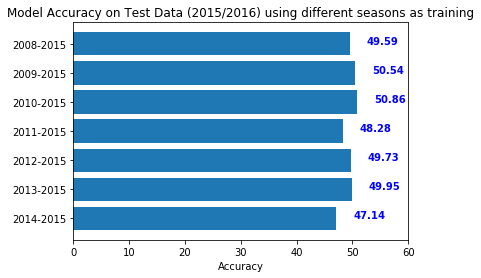

In [66]:
## plot the accuracy for the different scenarios above
import matplotlib.pyplot as plt

objects = ('2014-2015', '2013-2015', '2012-2015', '2011-2015', '2010-2015', '2009-2015','2008-2015')
y_pos = np.arange(len(objects))
r=[]
for i in range(len(results_saved)):
    r.append(results_saved[i]['acc_test']*100)
#display(r)
plt.barh(y_pos, r, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Model Accuracy on Test Data (2015/2016) using different seasons as training')
plt.xlim((0,60))

for i, v in enumerate(r):
    plt.text(v + 3, i, str('%.2f' %v), color='blue', fontweight='bold')
    
plt.show()


#### Let's try tuning the model on the training dataset that includes seasons 2011-2015

In [3]:
seasons_to_use=['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011']
train_data=train_data[train_data['season'].isin(seasons_to_use)]
display('Size of training dataset: ', train_data.shape[0])
X_train=train_data.drop(['season','Label'],axis=1)
Y_train=train_data['Label']

X_test=test_data.drop(['season','Label'],axis=1)
Y_test=test_data['Label']

'Size of training dataset: '

10468

In [68]:
from sklearn.model_selection import GridSearchCV

param_test2 = {
    'neural network__hidden_layer_sizes': [(n, min(n, 60)) for n in range(5, 60, 5)],
    #'activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline6, param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52866, std: 0.01685, params: {'neural network__hidden_layer_sizes': (5, 5)},
  mean: 0.52102, std: 0.02209, params: {'neural network__hidden_layer_sizes': (10, 10)},
  mean: 0.52694, std: 0.01694, params: {'neural network__hidden_layer_sizes': (15, 15)},
  mean: 0.52150, std: 0.02292, params: {'neural network__hidden_layer_sizes': (20, 20)},
  mean: 0.52312, std: 0.02338, params: {'neural network__hidden_layer_sizes': (25, 25)},
  mean: 0.52589, std: 0.02103, params: {'neural network__hidden_layer_sizes': (30, 30)},
  mean: 0.52188, std: 0.02058, params: {'neural network__hidden_layer_sizes': (35, 35)},
  mean: 0.52350, std: 0.02142, params: {'neural network__hidden_layer_sizes': (40, 40)},
  mean: 0.53029, std: 0.02126, params: {'neural network__hidden_layer_sizes': (45, 45)},
  mean: 0.53066, std: 0.02233, params: {'neural network__hidden_layer_sizes': (50, 50)},
  mean: 0.52350, std: 0.02337, params: {'neural network__hidden_layer_sizes': (55, 55)}],
 {'neural network__hid

In [69]:
pipeline4 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(50, 50), random_state=1, activation='logistic', max_iter=308))])
param_test3 = {
    'neural network__activation': ['identity', 'logistic', 'tanh', 'relu']
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53114, std: 0.01998, params: {'neural network__activation': 'identity'},
  mean: 0.53066, std: 0.02233, params: {'neural network__activation': 'logistic'},
  mean: 0.50917, std: 0.02673, params: {'neural network__activation': 'tanh'},
  mean: 0.48530, std: 0.03068, params: {'neural network__activation': 'relu'}],
 {'neural network__activation': 'identity'},
 0.53114393103819602)

In [70]:
pipeline4 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(50, 50), random_state=1, activation='identity', max_iter=308))])
param_test4 = {
    'neural network__alpha': [i/10000.0 for i in range(1,50,5)]
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53143, std: 0.02013, params: {'neural network__alpha': 0.0001},
  mean: 0.53133, std: 0.02121, params: {'neural network__alpha': 0.0006},
  mean: 0.53086, std: 0.02032, params: {'neural network__alpha': 0.0011},
  mean: 0.53114, std: 0.01998, params: {'neural network__alpha': 0.0016},
  mean: 0.53067, std: 0.02047, params: {'neural network__alpha': 0.0021},
  mean: 0.53114, std: 0.02058, params: {'neural network__alpha': 0.0026},
  mean: 0.53191, std: 0.02038, params: {'neural network__alpha': 0.0031},
  mean: 0.53200, std: 0.02066, params: {'neural network__alpha': 0.0036},
  mean: 0.53057, std: 0.02173, params: {'neural network__alpha': 0.0041},
  mean: 0.53124, std: 0.02084, params: {'neural network__alpha': 0.0046}],
 {'neural network__alpha': 0.0036},
 0.53200371260045165)

In [71]:
pipeline4 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0036,
                   hidden_layer_sizes=(50, 50), random_state=1, activation='identity', max_iter=308))])
param_test4 = {
    'neural network__max_iter': [i for i in range(100,1000,100)]
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53535, std: 0.01861, params: {'neural network__max_iter': 100},
  mean: 0.53162, std: 0.02042, params: {'neural network__max_iter': 200},
  mean: 0.53086, std: 0.02083, params: {'neural network__max_iter': 300},
  mean: 0.53124, std: 0.02066, params: {'neural network__max_iter': 400},
  mean: 0.53095, std: 0.02050, params: {'neural network__max_iter': 500},
  mean: 0.53095, std: 0.02050, params: {'neural network__max_iter': 600},
  mean: 0.53095, std: 0.02050, params: {'neural network__max_iter': 700},
  mean: 0.53095, std: 0.02050, params: {'neural network__max_iter': 800},
  mean: 0.53095, std: 0.02050, params: {'neural network__max_iter': 900}],
 {'neural network__max_iter': 100},
 0.53534732708155464)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

pipeline4 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0036,
                   hidden_layer_sizes=(50, 50), random_state=1, activation='identity', max_iter=308))])
param_test4 = {
    'neural network__max_iter': [i for i in range(100,200,10)]
}
gsearch2 = GridSearchCV(estimator = pipeline4, param_grid = param_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,Y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53535, std: 0.01861, params: {'neural network__max_iter': 100},
  mean: 0.53411, std: 0.01977, params: {'neural network__max_iter': 110},
  mean: 0.53172, std: 0.02184, params: {'neural network__max_iter': 120},
  mean: 0.53277, std: 0.02106, params: {'neural network__max_iter': 130},
  mean: 0.53334, std: 0.01964, params: {'neural network__max_iter': 140},
  mean: 0.53200, std: 0.02077, params: {'neural network__max_iter': 150},
  mean: 0.53248, std: 0.02024, params: {'neural network__max_iter': 160},
  mean: 0.53391, std: 0.01932, params: {'neural network__max_iter': 170},
  mean: 0.53296, std: 0.02179, params: {'neural network__max_iter': 180},
  mean: 0.53162, std: 0.01998, params: {'neural network__max_iter': 190}],
 {'neural network__max_iter': 100},
 0.53534732708155464)

In [11]:
pipeline5 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0036,
                   hidden_layer_sizes=(50, 50), random_state=1, activation='identity', max_iter=100))])

result= train_predict(pipeline5, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [12]:
result

{'acc_test': 0.50407978241160467,
 'acc_train': 0.54333333333333333,
 'f_test': 0.50407978241160467,
 'f_train': 0.54333333333333333,
 'train_time': 1.567326307296753}

#### Using this dataset improved the accuracy to 50.4% 

### Let's try increasing the depth of the neural network 

In [49]:
pipeline5 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0036,
                   hidden_layer_sizes=(50, 50, 50, 10, 10, 10, 10), random_state=1, activation='identity', max_iter=100))])

result= train_predict(pipeline5, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [50]:
result

{'acc_test': 0.50589301903898454,
 'acc_train': 0.53666666666666663,
 'f_test': 0.50589301903898454,
 'f_train': 0.53666666666666663,
 'train_time': 2.4750936031341553}

#### This led to a slight increase in accuracy (50.58%). However, increasing the depth might lead to overfitting!

## Let's try predicting another season (season 14/15) and training on the corresponding previous seasons

In [75]:
final_dataset = pd.read_csv('FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON.csv',index_col=0)

## Extract season 2015/2016 matches as test data
this_season='2015/2016'
final_dataset=final_dataset.drop(final_dataset[final_dataset['season']==this_season].index)

test_season='2014/2015'
test_data=final_dataset[final_dataset['season']==test_season]

train_data=final_dataset.drop(test_data.index)

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

pipeline6 = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network',  MLPClassifier(solver='lbfgs', alpha=0.0016,
                   hidden_layer_sizes=(35, 35), random_state=1, activation='logistic', max_iter=308))])

seasons_to_use=[]
seasons_used=[]
results_saved=[]
count=0
for season in np.flip(np.sort(train_data['season'].unique()),axis=0):
    seasons_to_use.append(season)
    print('Using seasons: ', seasons_to_use)
    result=train_test_dynamically_adding_seasons(pipeline6,train_data,test_data,seasons_to_use)
    results_saved.append(result)
    print(result)
    print('........................................')
    #seasons_used[count].append[seasons_to_use]
    count=count+1

Using seasons:  ['2013/2014']


'Size of training dataset: '

2019

Pipeline trained.
{'train_time': 1.137437343597412, 'acc_train': 0.67666666666666664, 'acc_test': 0.4747431506849315, 'f_train': 0.67666666666666664, 'f_test': 0.4747431506849315}
........................................
Using seasons:  ['2013/2014', '2012/2013']


'Size of training dataset: '

4226

Pipeline trained.
{'train_time': 2.8182432651519775, 'acc_train': 0.55000000000000004, 'acc_test': 0.50214041095890416, 'f_train': 0.55000000000000004, 'f_test': 0.50214041095890416}
........................................
Using seasons:  ['2013/2014', '2012/2013', '2011/2012']


'Size of training dataset: '

6313

Pipeline trained.
{'train_time': 4.086312294006348, 'acc_train': 0.56666666666666665, 'acc_test': 0.52397260273972601, 'f_train': 0.56666666666666665, 'f_test': 0.52397260273972601}
........................................
Using seasons:  ['2013/2014', '2012/2013', '2011/2012', '2010/2011']


'Size of training dataset: '

8132

Pipeline trained.
{'train_time': 5.177267789840698, 'acc_train': 0.54666666666666663, 'acc_test': 0.52568493150684936, 'f_train': 0.54666666666666663, 'f_test': 0.52568493150684936}
........................................
Using seasons:  ['2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010']


'Size of training dataset: '

9853

Pipeline trained.
{'train_time': 6.189934968948364, 'acc_train': 0.55666666666666664, 'acc_test': 0.52054794520547942, 'f_train': 0.55666666666666664, 'f_test': 0.52054794520547942}
........................................
Using seasons:  ['2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010', '2008/2009']


'Size of training dataset: '

11225

Pipeline trained.
{'train_time': 7.27231502532959, 'acc_train': 0.53000000000000003, 'acc_test': 0.52097602739726023, 'f_train': 0.53000000000000003, 'f_test': 0.52097602739726023}
........................................


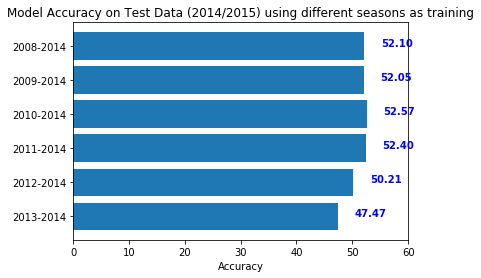

In [79]:
## plot the accuracy for the different scenarios above
import matplotlib.pyplot as plt

objects = ('2013-2014', '2012-2014', '2011-2014', '2010-2014', '2009-2014', '2008-2014')
y_pos = np.arange(len(objects))
r=[]
for i in range(len(results_saved)):
    r.append(results_saved[i]['acc_test']*100)
#display(r)
plt.barh(y_pos, r, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Model Accuracy on Test Data (2014/2015) using different seasons as training')
plt.xlim((0,60))

for i, v in enumerate(r):
    plt.text(v + 3, i, str('%.2f' %v), color='blue', fontweight='bold')
    
plt.show()


#### Checking if it's overfitting!

In [82]:
from sklearn.model_selection import cross_val_score

seasons_to_use=['2013/2014', '2012/2013', '2011/2012', '2010/2011']
train_data=train_data[train_data['season'].isin(seasons_to_use)]
display('Size of training dataset: ', train_data.shape[0])
X_train=train_data.drop(['season','Label'],axis=1)
Y_train=train_data['Label']

scores=cross_val_score(pipeline6, X_train, Y_train, cv=5)
display(scores)

pred=pipeline6.predict(X_train)
accuracy_score(Y_train,pred)

'Size of training dataset: '

8132

array([ 0.52948403,  0.49477566,  0.4978488 ,  0.54338462,  0.56      ])

0.55582882439744219